<a href="https://colab.research.google.com/github/sehab1611251/Forecasting-AQI-in-Oklahoma-City-Using-ARIMA-Models/blob/main/TSA_Model_Implementations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
################### Install necessary libraries  #############

install.packages("forecast")

install.packages("gridExtra")


# Install the 'fastDummies' package if not already installed
if (!require("fastDummies")) {
  install.packages("fastDummies")
}

# Load the library
library(forecast)

library(lubridate)  # Load the lubridate package for date parsing

# Load necessary library
library(ggplot2)

# Load the 'fastDummies' library
library(fastDummies)

# Load the 'dplyr' library
library(dplyr)

# Load the zoo package
library(zoo)

library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quantmod’, ‘tseries’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: fastDummies

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘fastDummies’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘zoo’


The following objects are masked from

In [ ]:
############################### Dataset Preprocessing #####################################
# Read the CSV files
air_data <- read.csv("air_data.csv")
meteorological_data <- read.csv("meteorological_data.csv")

# Display the first few rows of air_data
print("air_data:")
head(air_data)
cat("\n\n")
print("meteorological_data:")
# Display the first few rows of meteorological_data
head(meteorological_data)

[1] "air_data:"


Date   Source Site.ID   POC Daily.Max.1.hour.NO2.Concentration Units
1 1/1/23 AQS    401090097 1   31                                 ppb  
2 1/2/23 AQS    401090097 1   22                                 ppb  
3 1/3/23 AQS    401090097 1   12                                 ppb  
4 1/4/23 AQS    401090097 1   17                                 ppb  
5 1/5/23 AQS    401090097 1   38                                 ppb  
6 1/6/23 AQS    401090097 1   37                                 ppb  
  Daily.AQI.Value Local.Site.Name Daily.Obs.Count Percent.Complete ⋯
1 29              Near Road       24              100              ⋯
2 21              Near Road       24              100              ⋯
3 11              Near Road       24              100              ⋯
4 16              Near Road       22               92              ⋯
5 36              Near Road       19               79              ⋯
6 35              Near Road       24              100              ⋯
  AQS.Parameter.Description Method.Code CBSA.Code CBSA.Name        
1 Nitrogen dioxide (NO2)    74          36420     Oklahoma City, OK
2 Nitrogen dioxide (NO2)    74          36420     Oklahoma City, OK
3 Nitrogen dioxide (NO2)    74          36420     Oklahoma City, OK
4 Nitrogen dioxide (NO2)    74          36420     Oklahoma City, OK
5 Nitrogen dioxide (NO2)    74          36420     Oklahoma City, OK
6 Nitrogen dioxide (NO2)    74          36420     Oklahoma City, OK
  State.FIPS.Code State    County.FIPS.Code County   Site.Latitude
1 40              Oklahoma 109              Oklahoma 35.50307     
2 40              Oklahoma 109              Oklahoma 35.50307     
3 40              Oklahoma 109              Oklahoma 35.50307     
4 40              Oklahoma 109              Oklahoma 35.50307     
5 40              Oklahoma 109              Oklahoma 35.50307     
6 40              Oklahoma 109              Oklahoma 35.50307     
  Site.Longitude
1 -97.57798     
2 -97.57798     
3 -97.57798     
4 -97.57798     
5 -97.57798     
6 -97.57798



[1] "meteorological_data:"


name          datetime tempmax tempmin temp feelslikemax feelslikemin
1 oklahoma city 1/1/23   22.0     6.2    12.5 22.0          3.3        
2 oklahoma city 2/1/23   20.9     8.1    14.4 20.9          5.9        
3 oklahoma city 3/1/23   12.0     2.8     7.3 12.0         -0.5        
4 oklahoma city 4/1/23   11.2    -0.6     4.5 11.2         -4.5        
5 oklahoma city 5/1/23   12.3    -2.6     4.8 12.3         -5.7        
6 oklahoma city 6/1/23   18.7     2.3    10.2 18.7         -1.4        
  feelslike dew  humidity ⋯ solarenergy uvindex severerisk sunrise            
1 11.5       4.9 63.0     ⋯  9.0        5       10         2023-01-01T07:39:27
2 14.1      12.3 87.3     ⋯  5.5        3       60         2023-01-02T07:39:37
3  4.9      -0.6 59.1     ⋯  9.5        5       10         2023-01-03T07:39:45
4  2.2      -3.5 58.3     ⋯ 11.2        6       10         2023-01-04T07:39:51
5  2.7      -6.3 47.8     ⋯ 10.3        5       10         2023-01-05T07:39:55
6  8.6       0.8 54.1     ⋯  6.1        5       10         2023-01-06T07:39:57
  sunset              moonphase conditions            
1 2023-01-01T17:28:04 0.32      Partially cloudy      
2 2023-01-02T17:28:51 0.36      Rain, Partially cloudy
3 2023-01-03T17:29:39 0.39      Partially cloudy      
4 2023-01-04T17:30:28 0.42      Partially cloudy      
5 2023-01-05T17:31:18 0.46      Clear                 
6 2023-01-06T17:32:09 0.50      Partially cloudy      
  description                                           icon             
1 Partly cloudy throughout the day.                     partly-cloudy-day
2 Partly cloudy throughout the day with afternoon rain. rain             
3 Partly cloudy throughout the day.                     partly-cloudy-day
4 Clearing in the afternoon.                            partly-cloudy-day
5 Clear conditions throughout the day.                  clear-day        
6 Partly cloudy throughout the day.                     partly-cloudy-day
  stations                                                      
1 72354013919,72353013967,KTIK,AV216,KPWA,KOKC,72354403954      
2 72354013919,72353013967,KTIK,AV216,KPWA,KOKC,72354403954      
3 72354013919,72353013967,KTIK,AV216,KPWA,KOKC,72354403954      
4 F2084,72354013919,72353013967,KTIK,AV216,KPWA,KOKC,72354403954
5 F2084,72354013919,72353013967,KTIK,AV216,KPWA,KOKC,72354403954
6 F2084,72354013919,72353013967,KTIK,AV216,KPWA,KOKC,72354403954

In [ ]:
# Convert 'Date' columns to date format
air_data$Date <- as.Date(air_data$Date, format = "%m/%d/%Y")

# Convert 'datetime' in meteorological_data to Date
meteorological_data$datetime <- as.Date(meteorological_data$datetime, format = "%d/%m/%y")

# Extract date from 'datetime' in meteorological_data
meteorological_data$Date <- as.Date(meteorological_data$datetime)

# Remove "Daily.Max.1.hour.NO2.Concentration" and "POC" from air_data
air_data <- air_data[, !(names(air_data) %in% c("Daily.Max.1.hour.NO2.Concentration", "POC"))]

# Select necessary columns from meteorological_data
meteorological_data <- meteorological_data[, c("Date", "tempmax", "tempmin", "temp", "precip",
                                               "windspeed", "cloudcover", "humidity",
                                               "visibility", "solarradiation", "sealevelpressure",
                                               "dew")]

# Merge the meteorological_data with the air_data on 'Date'
merged_data <- merge(air_data, meteorological_data, by = "Date")

# Check for missing values in all columns
missing_values <- colSums(is.na(merged_data))

cat("\nMissing Values in All Columns:\n")
print(missing_values)


# Remove rows with any missing values in any column
merged_data <- na.omit(merged_data)


# Ensure 'Date' column is of Date type
merged_data$Date <- as.Date(merged_data$Date)

# Sort the merged_data by the Date column in ascending order
merged_data <- merged_data[order(merged_data$Date), ]


Missing Values in All Columns:
                     Date                    Source                   Site.ID 
                        0                         0                         0 
                    Units           Daily.AQI.Value           Local.Site.Name 
                        0                         0                         0 
          Daily.Obs.Count          Percent.Complete        AQS.Parameter.Code 
                        0                         0                         0 
AQS.Parameter.Description               Method.Code                 CBSA.Code 
                        0                         0                         0 
                CBSA.Name           State.FIPS.Code                     State 
                        0                         0                         0 
         County.FIPS.Code                    County             Site.Latitude 
                        0                         0                         0 
           Site.Long

In [ ]:
# Get a summary of each column
summary(merged_data)

      Date               Source             Site.ID             Units          
 Min.   :2021-01-13   Length:1217        Min.   :401090097   Length:1217       
 1st Qu.:2021-09-30   Class :character   1st Qu.:401090097   Class :character  
 Median :2022-06-27   Mode  :character   Median :401091037   Mode  :character  
 Mean   :2022-07-06                      Mean   :401090569                     
 3rd Qu.:2023-03-30                      3rd Qu.:401091037                     
 Max.   :2023-12-31                      Max.   :401091037                     
 Daily.AQI.Value Local.Site.Name    Daily.Obs.Count Percent.Complete
 Min.   : 0.00   Length:1217        Min.   :18.00   Min.   : 75.00  
 1st Qu.: 8.00   Class :character   1st Qu.:24.00   1st Qu.:100.00  
 Median :16.00   Mode  :character   Median :24.00   Median :100.00  
 Mean   :16.95                      Mean   :23.64   Mean   : 98.49  
 3rd Qu.:25.00                      3rd Qu.:24.00   3rd Qu.:100.00  
 Max.   :53.00            

In [ ]:
# Separate the data by site
near_road_data <- merged_data[merged_data$Local.Site.Name == "Near Road", ]
okc_north_data <- merged_data[merged_data$Local.Site.Name == "OKC NORTH", ]

In [ ]:
# Ensure data is sorted by date
near_road_data <- near_road_data[order(near_road_data$Date), ]
okc_north_data <- okc_north_data[order(okc_north_data$Date), ]

In [ ]:
# Calculate Rolling Mean and Variance using rollapply from zoo library
calculate_rolling_stats <- function(data, window_size) {
  rolling_mean <- rollapply(data, width = window_size, FUN = function(x) mean(x, na.rm = TRUE), align = "right", fill = NA)
  rolling_variance <- rollapply(data, width = window_size, FUN = function(x) var(x, na.rm = TRUE), align = "right", fill = NA)

  return(list(mean = rolling_mean, variance = rolling_variance))
}


# Function to plot rolling mean and variance
plot_rolling_stats <- function(data, rolling_stats, site_name) {
  # Combine the data with the rolling statistics
  plot_data <- data.frame(
    Date = data$Date,
    Daily_AQI_Value = data$Daily.AQI.Value,
    RollingMean = rolling_stats$mean,
    RollingVariance = rolling_stats$variance
  )

  # Remove rows with NA values
  plot_data <- na.omit(plot_data)

  # Plotting
  ggplot(plot_data, aes(x = Date)) +
    geom_line(aes(y = Daily_AQI_Value, color = "Daily AQI Value")) +
    geom_line(aes(y = RollingMean, color = "Rolling Mean")) +
    geom_line(aes(y = RollingVariance, color = "Rolling Variance")) +
    labs(title = paste("Rolling Mean and Variance -", site_name),
         x = "Date", y = "Value") +
    scale_color_manual(name = "Legend",
                       values = c("Daily AQI Value" = "black", "Rolling Mean" = "blue", "Rolling Variance" = "red")) +
    theme_minimal()
}

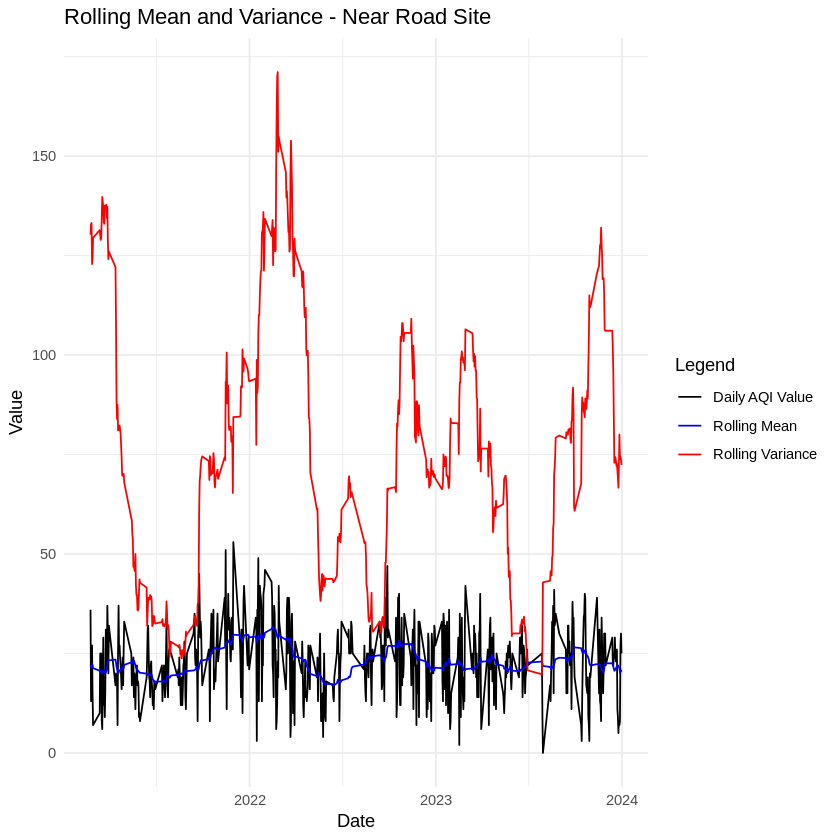

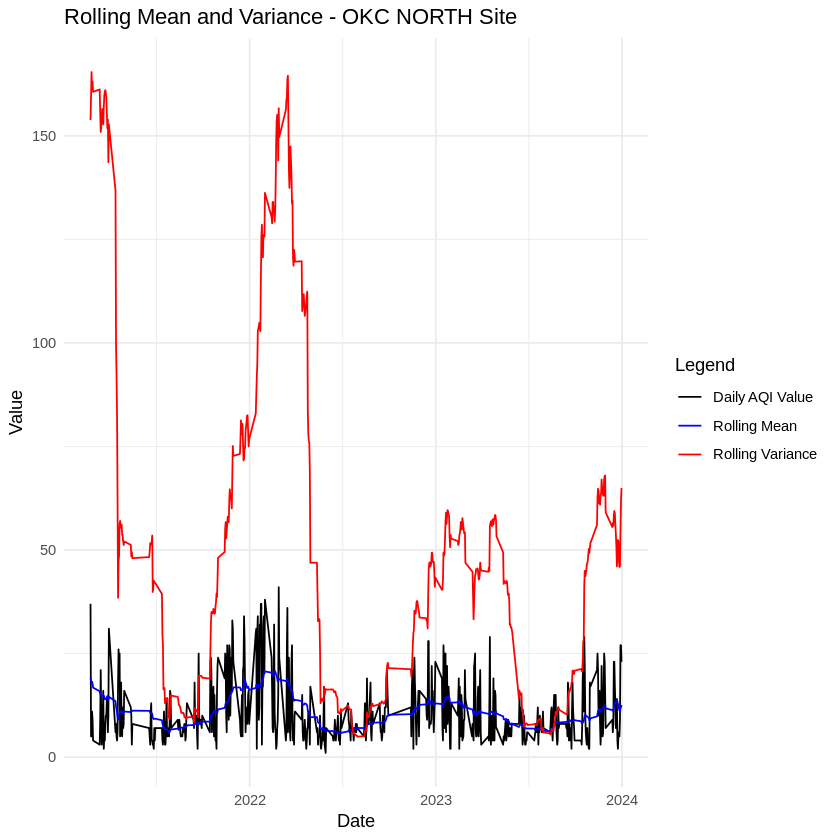

In [ ]:
# Calculate and Plot rolling statistics on each site of the original data

# Set the window size (e.g., 30 days)
window_size <- 30

# Apply rolling statistics
near_road_rolling_stats <- calculate_rolling_stats(near_road_data$Daily.AQI.Value, window_size)
okc_north_rolling_stats <- calculate_rolling_stats(okc_north_data$Daily.AQI.Value, window_size)

# Plot Rolling Mean and Variance for Near Road site
plot_rolling_stats(near_road_data, near_road_rolling_stats, "Near Road Site")

# Plot Rolling Mean and Variance for OKC NORTH site
plot_rolling_stats(okc_north_data, okc_north_rolling_stats, "OKC NORTH Site")

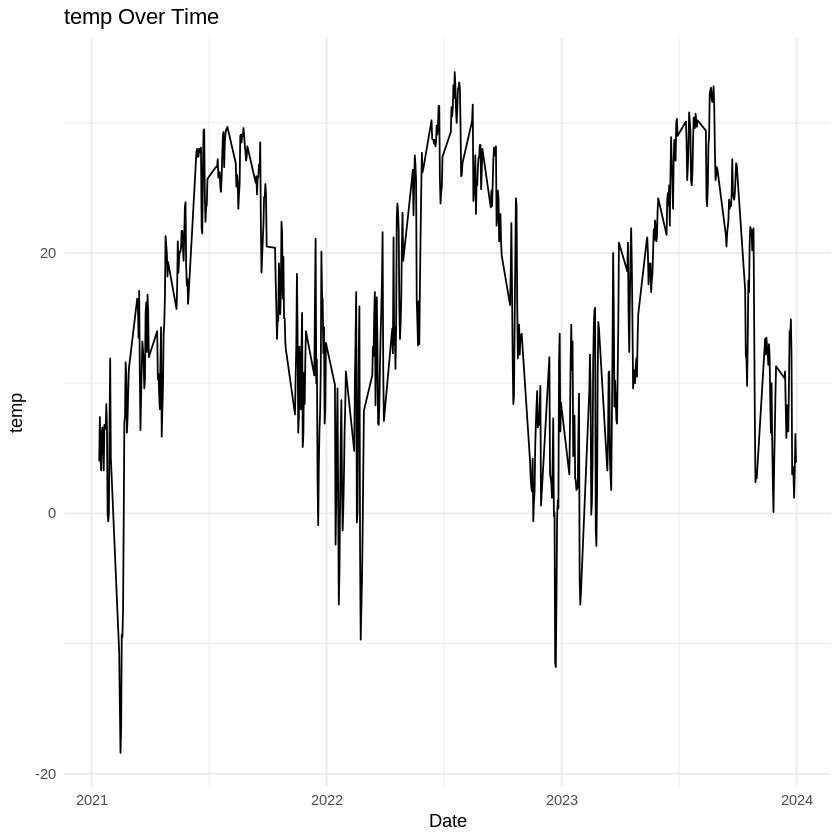

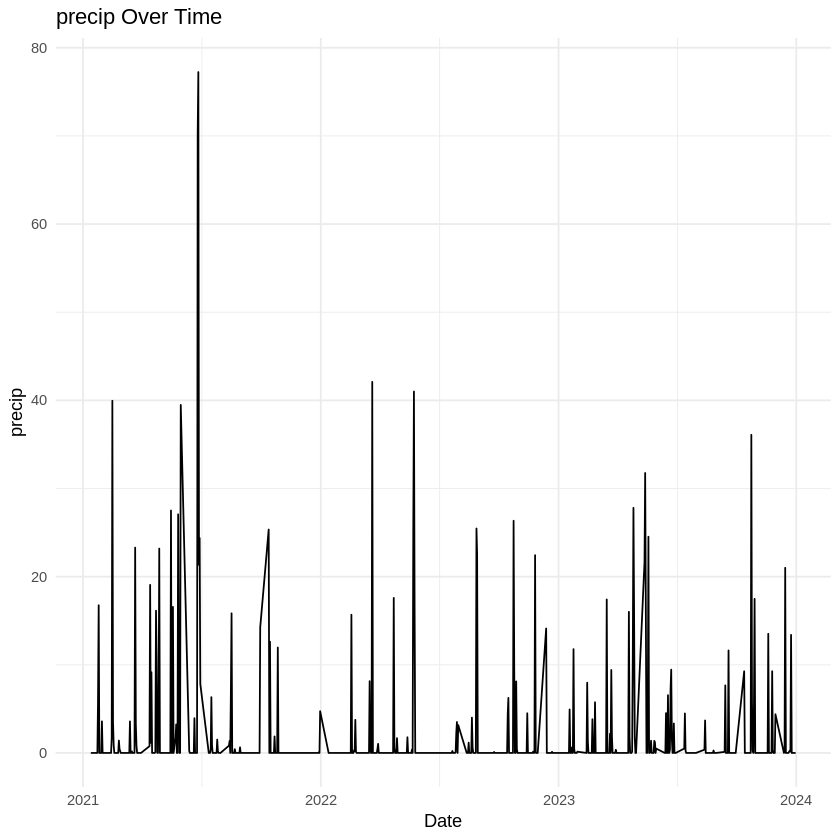

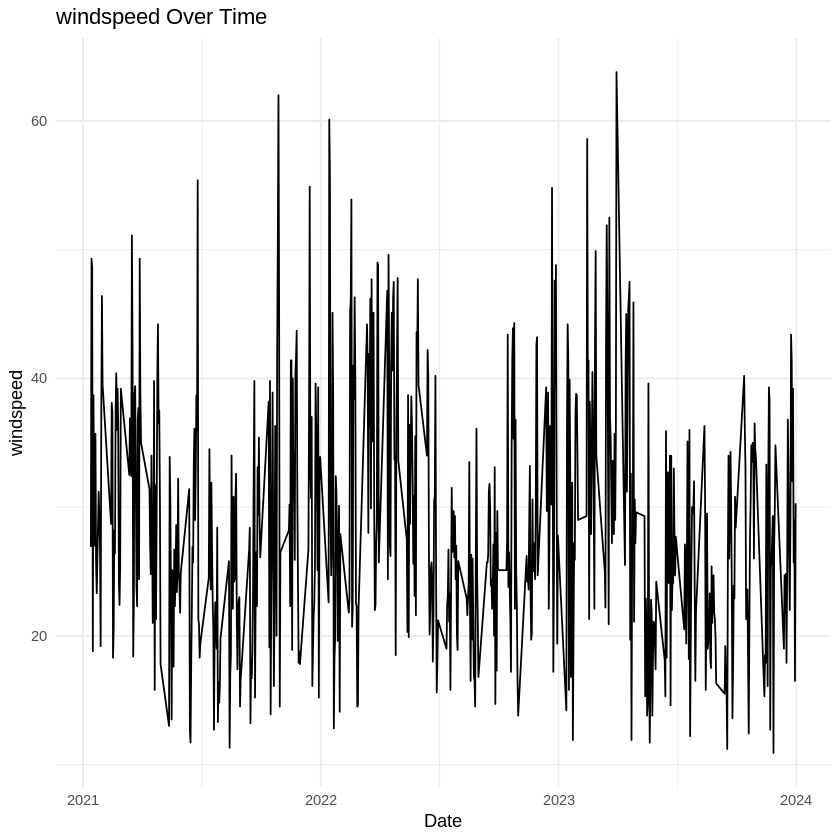

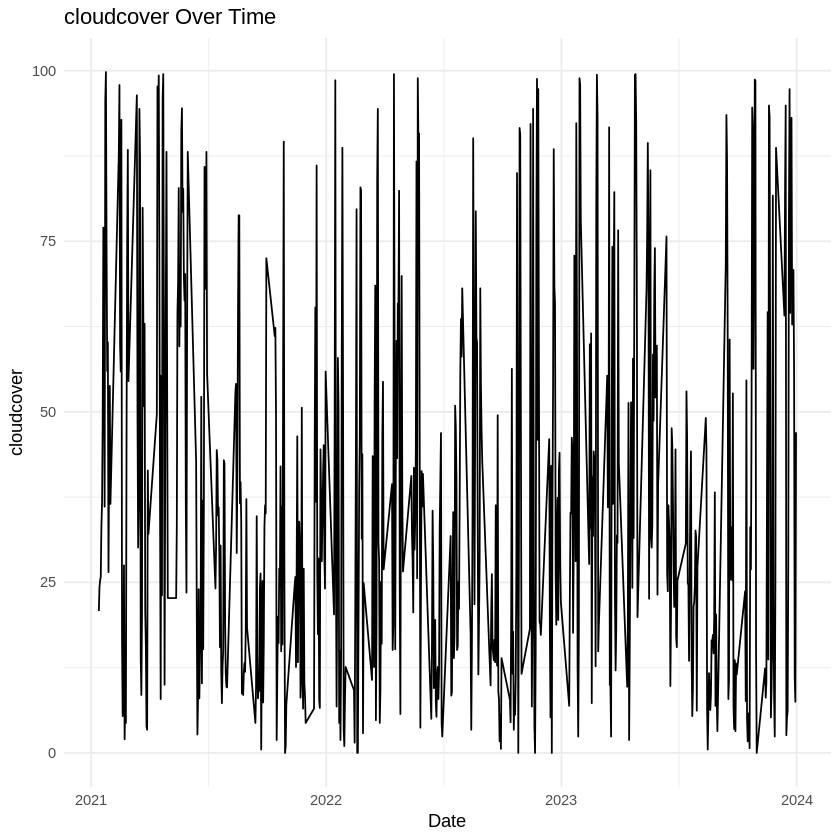

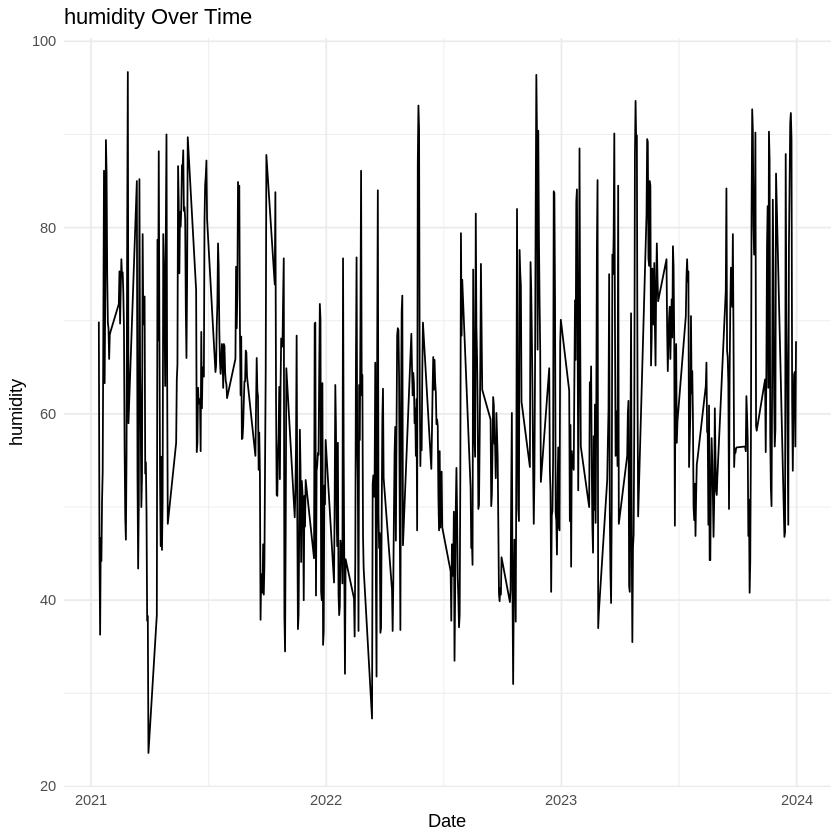

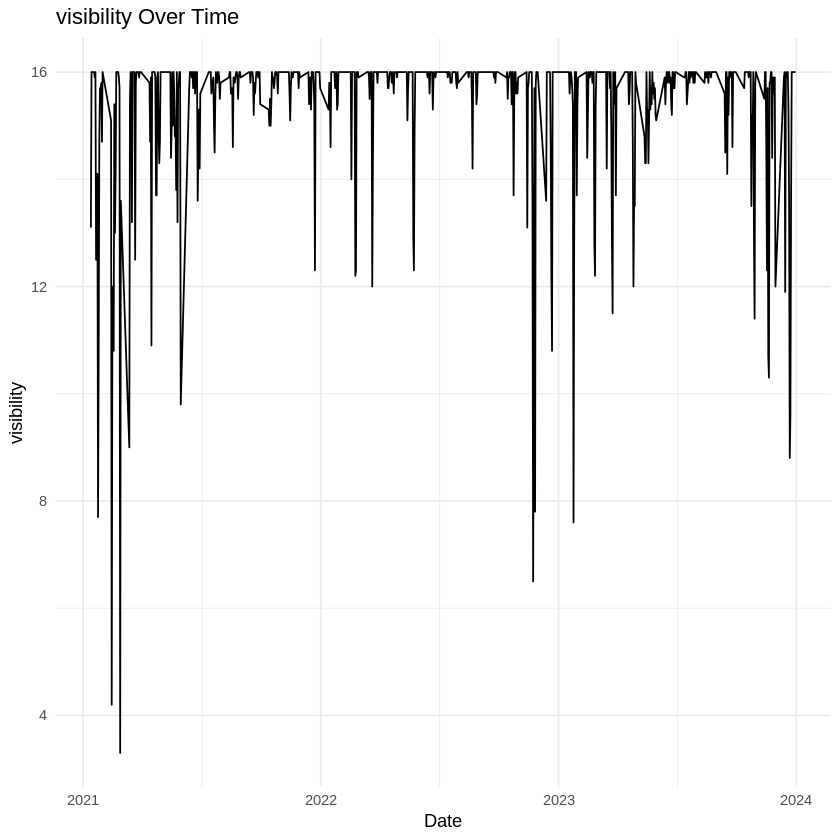

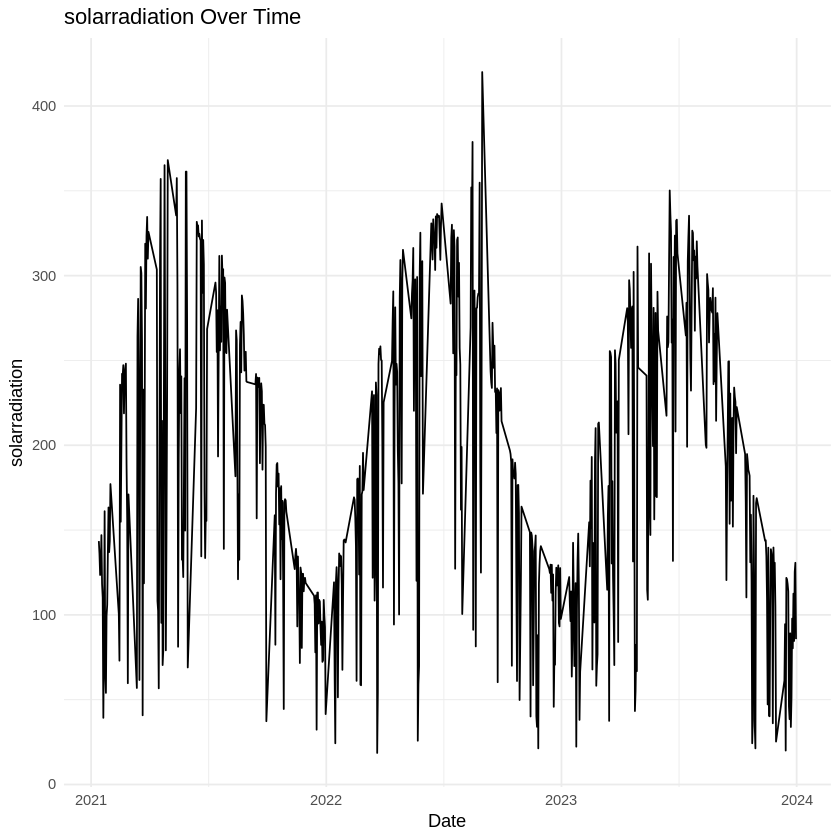

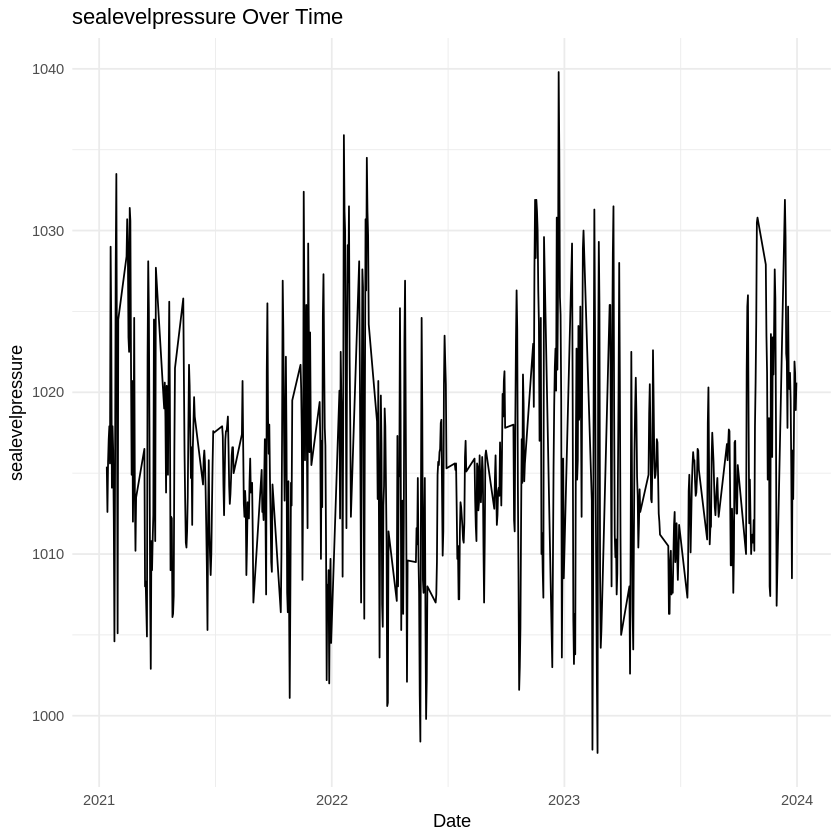

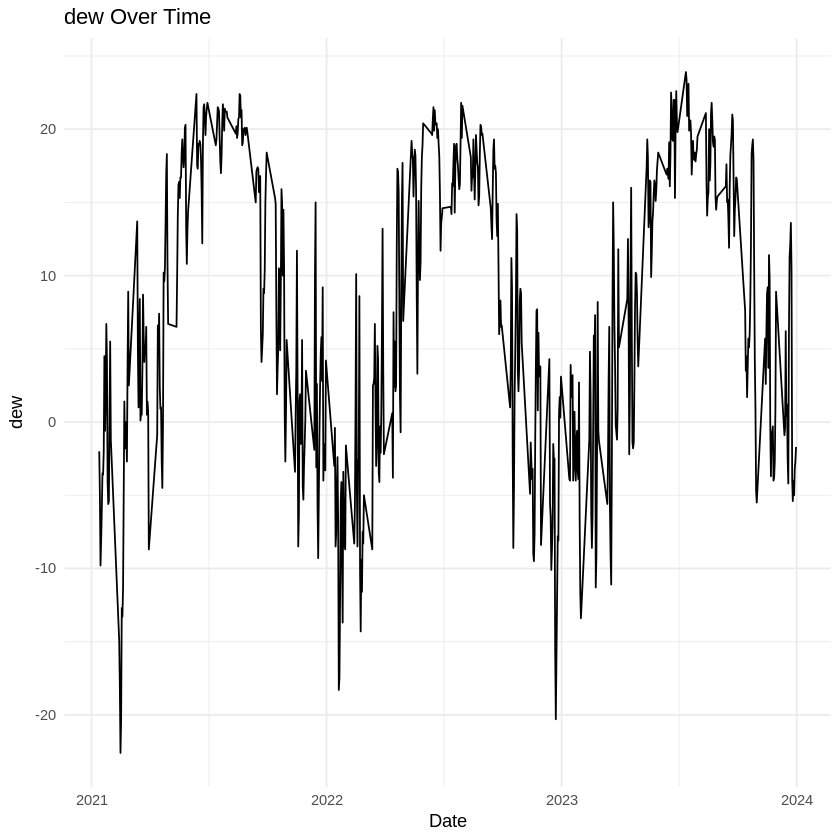

In [ ]:
######################################### Data Analysis ###########################################
# Define the list of meteorological variables
meteorological_vars <- c("temp", "precip", "windspeed", "cloudcover", "humidity", "visibility","solarradiation", "sealevelpressure", "dew")

# Generate line plots for each meteorological variable
for (var in meteorological_vars) {
  ggplot(merged_data, aes(x = Date, y = .data[[var]])) +
    geom_line() +
    labs(title = paste(var, "Over Time"), x = "Date", y = var) +
    theme_minimal()  # Adding a cleaner theme to the plots
  print(last_plot())
}

In [ ]:
# Ensure all AQI values are positive for Box-Cox transformation for each site
# Function to apply positivity shift if needed
ensure_positive_aqi <- function(data) {
  min_aqi_value <- min(data$Daily.AQI.Value, na.rm = TRUE)
  if (min_aqi_value <= 0) {
    shift_value <- abs(min_aqi_value) + 1  # Adding a constant to ensure positivity
    data$Daily.AQI.Value <- data$Daily.AQI.Value + shift_value
  }
  return(data)
}

# Apply to each site
near_road_data <- ensure_positive_aqi(near_road_data)
okc_north_data <- ensure_positive_aqi(okc_north_data)

# Apply Box-Cox transformation for each site
bc_transform_near_road <- BoxCox.lambda(near_road_data$Daily.AQI.Value) # Determine the optimal Box-Cox transformation parameter (lambda)
near_road_data$transformed_AQI <- BoxCox(near_road_data$Daily.AQI.Value, bc_transform_near_road)

bc_transform_okc_north <- BoxCox.lambda(okc_north_data$Daily.AQI.Value)  # Determine the optimal Box-Cox transformation parameter (lambda)
okc_north_data$transformed_AQI <- BoxCox(okc_north_data$Daily.AQI.Value, bc_transform_okc_north)

In [ ]:
# Print lambda values
cat("Lambda value for Near Road:", bc_transform_near_road, "\n")
cat("Lambda value for OKC North:", bc_transform_okc_north, "\n")

Lambda value for Near Road: 0.7353356 
Lambda value for OKC North: -0.1907166 


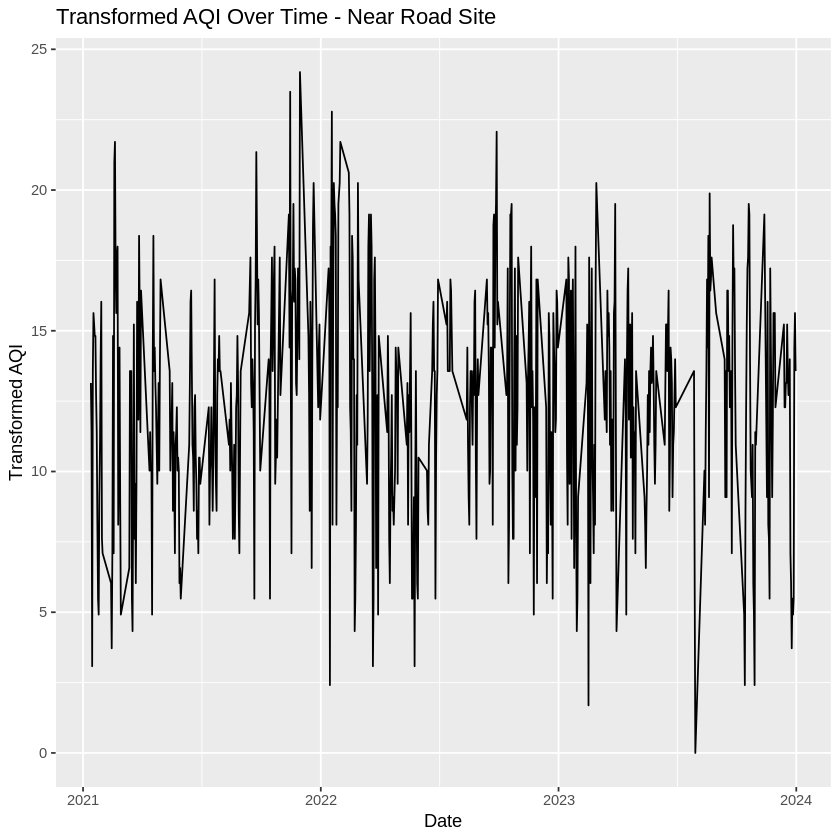

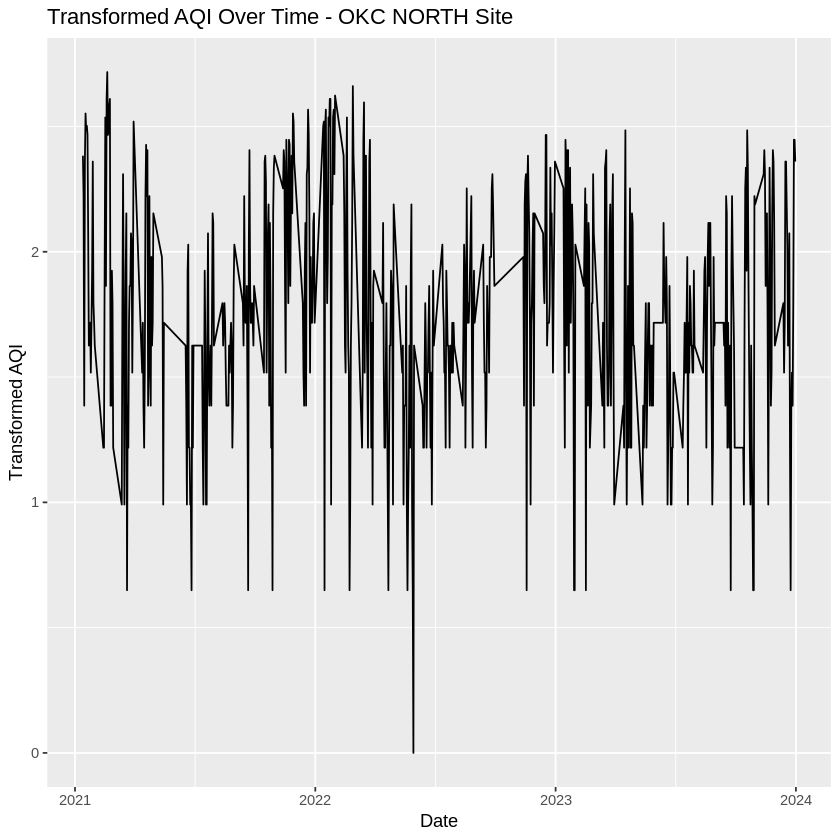

In [ ]:
# Plot the transformed AQI over time for each site
ggplot(near_road_data, aes(x = Date, y = transformed_AQI)) +
  geom_line() +
  labs(title = "Transformed AQI Over Time - Near Road Site", x = "Date", y = "Transformed AQI")

ggplot(okc_north_data, aes(x = Date, y = transformed_AQI)) +
  geom_line() +
  labs(title = "Transformed AQI Over Time - OKC NORTH Site", x = "Date", y = "Transformed AQI")

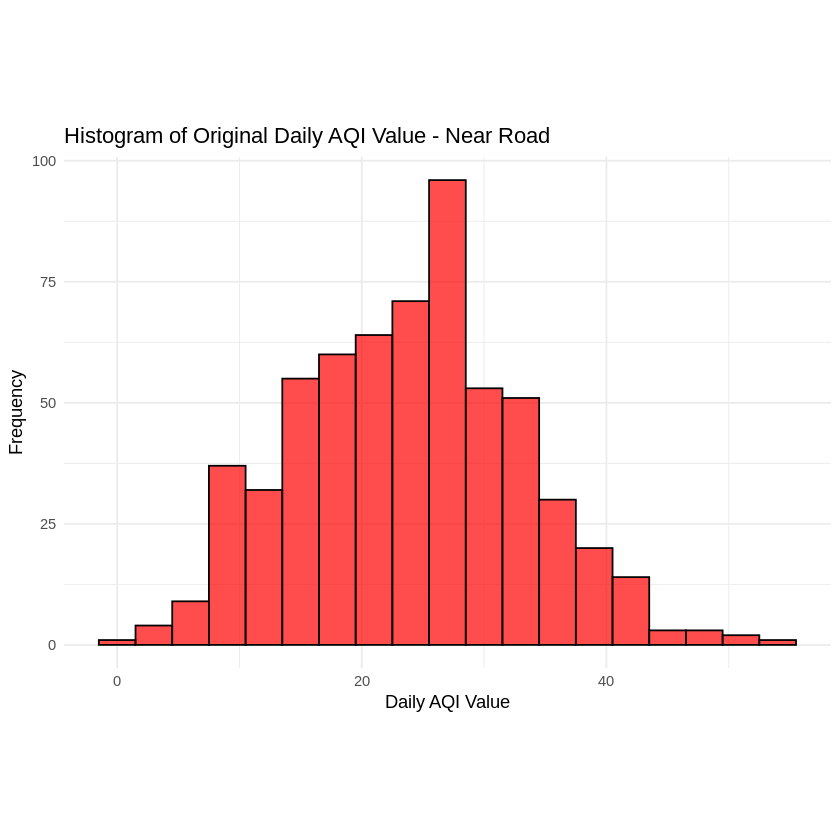

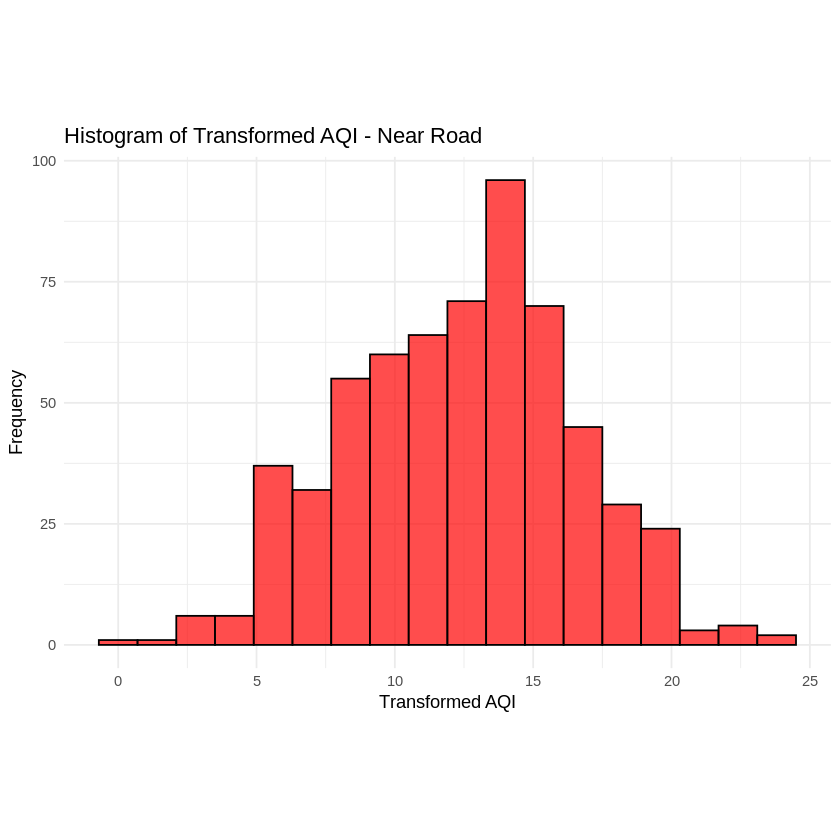

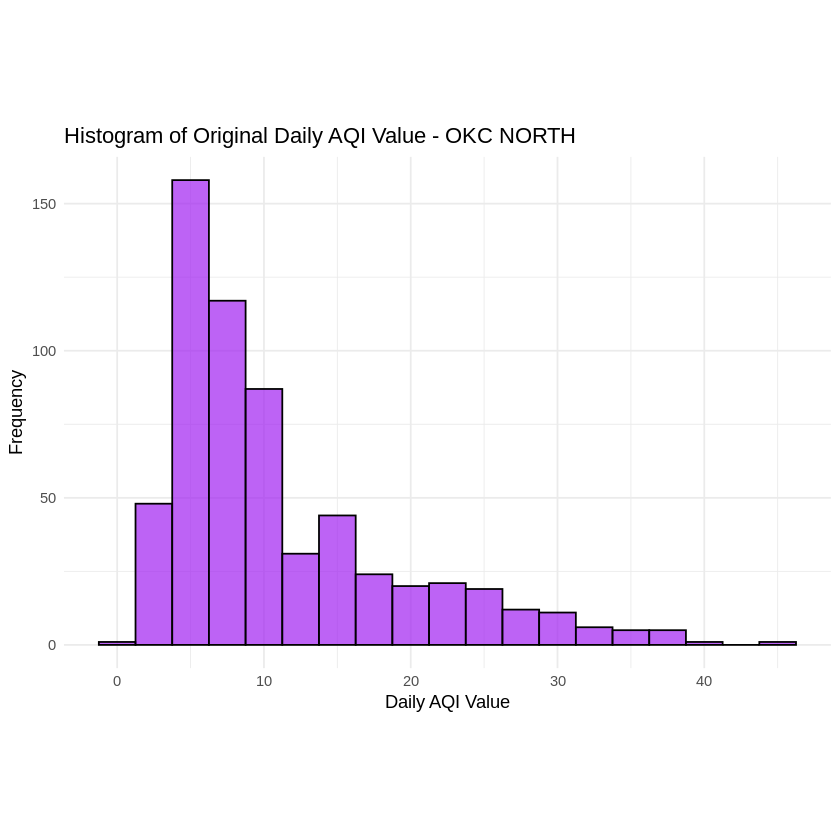

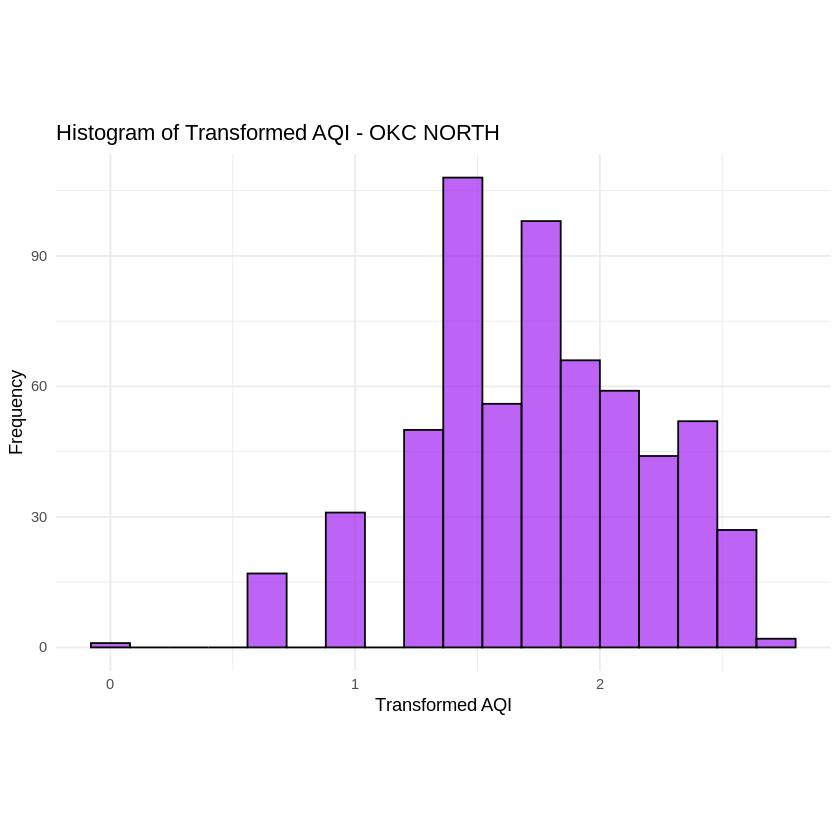

In [ ]:
# Visualize the original and transformed AQI Value with histograms for each site
p1_near_road <- ggplot(near_road_data, aes(x = Daily.AQI.Value)) +
  geom_histogram(binwidth = 3, fill = "red", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Original Daily AQI Value - Near Road", x = "Daily AQI Value", y = "Frequency") +
  theme_minimal() +
  theme(aspect.ratio = 1/1.5)

p2_near_road <- ggplot(near_road_data, aes(x = transformed_AQI)) +
  geom_histogram(binwidth = 1.4, fill = "red", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Transformed AQI - Near Road", x = "Transformed AQI", y = "Frequency") +
  theme_minimal() +
  theme(aspect.ratio = 1/1.5)

p1_okc_north <- ggplot(okc_north_data, aes(x = Daily.AQI.Value)) +
  geom_histogram(binwidth = 2.5, fill = "purple", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Original Daily AQI Value - OKC NORTH", x = "Daily AQI Value", y = "Frequency") +
  theme_minimal() +
  theme(aspect.ratio = 1/1.5)

p2_okc_north <- ggplot(okc_north_data, aes(x = transformed_AQI)) +
  geom_histogram(binwidth = 0.16, fill = "purple", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Transformed AQI - OKC NORTH", x = "Transformed AQI", y = "Frequency") +
  theme_minimal() +
  theme(aspect.ratio = 1/1.5)

# Print the histograms for both sites
print(p1_near_road)
print(p2_near_road)
print(p1_okc_north)
print(p2_okc_north)

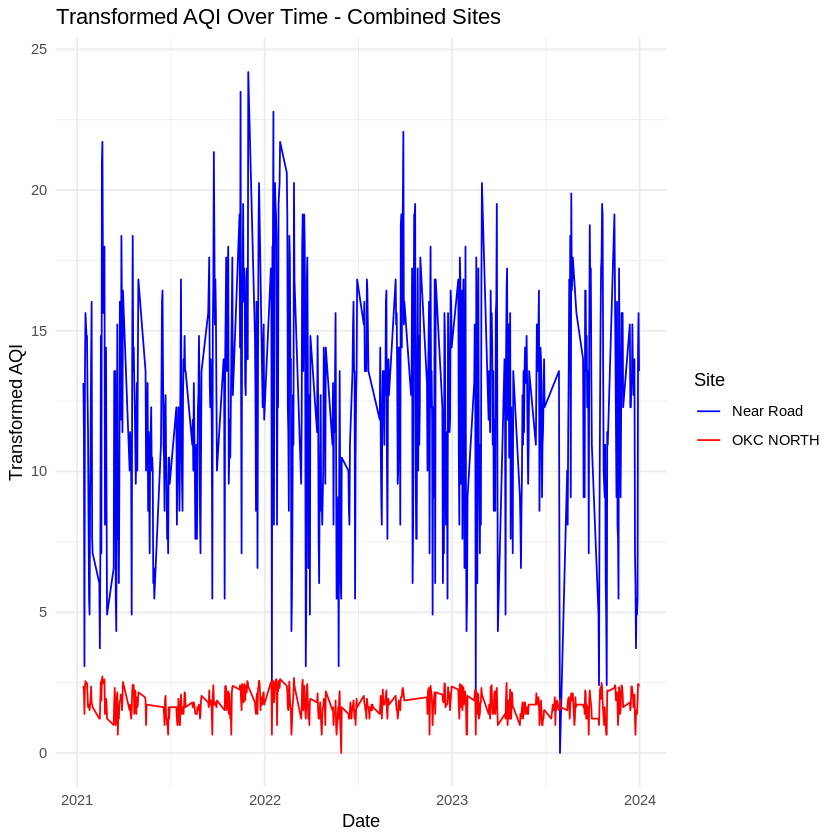

In [ ]:
# Combine the transformed AQI for both sites for plotting
combined_data_aqi <- rbind(
  data.frame(Date = near_road_data$Date, AQI = near_road_data$transformed_AQI, Site = "Near Road"),
  data.frame(Date = okc_north_data$Date, AQI = okc_north_data$transformed_AQI, Site = "OKC NORTH")
)

# Plot the transformed AQI over time for both sites without normalization
ggplot(combined_data_aqi, aes(x = Date, y = AQI, color = Site)) +
  geom_line() +
  labs(title = "Transformed AQI Over Time - Combined Sites", x = "Date", y = "Transformed AQI") +
  theme_minimal() +
  scale_color_manual(values = c("Near Road" = "blue", "OKC NORTH" = "red"))

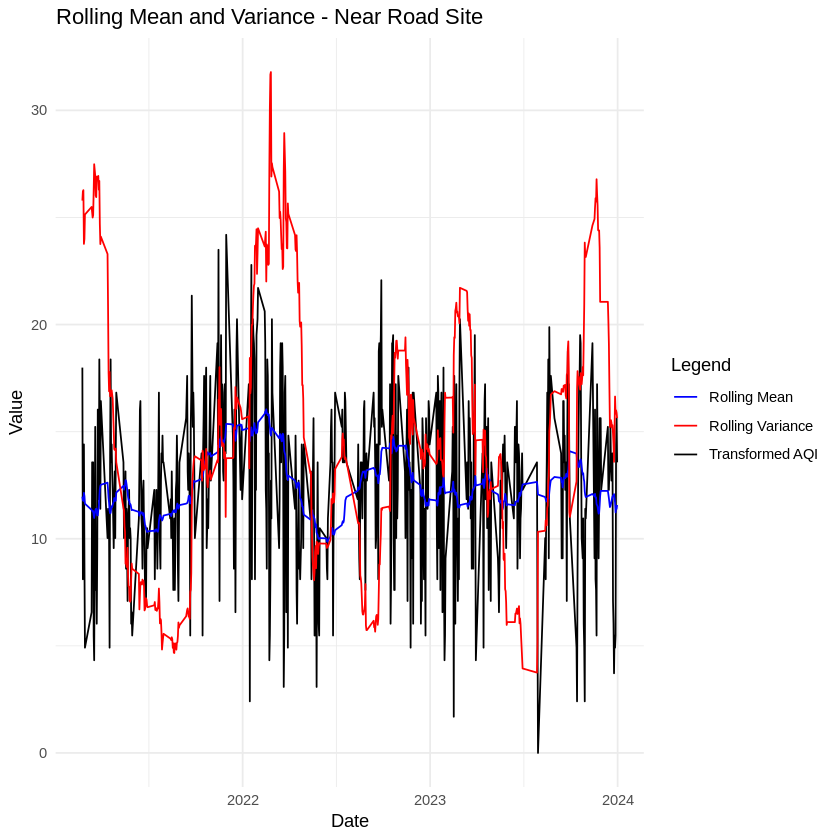

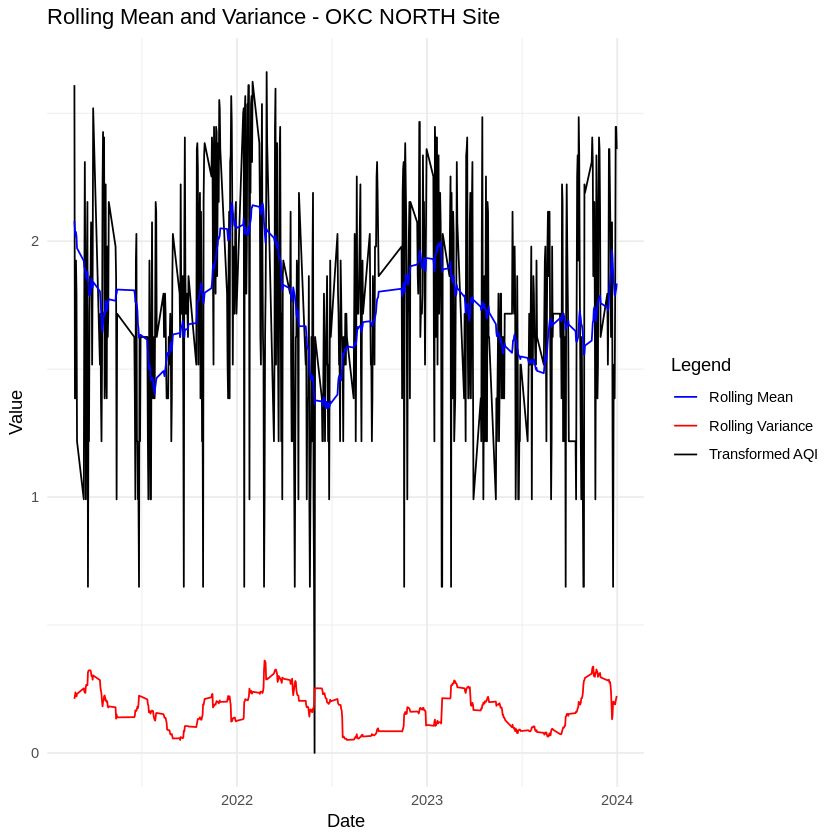

In [ ]:
# Ensure all transformed AQI values are positive for further analysis
# Function to apply positivity shift if needed
ensure_positive_transformed_aqi <- function(data) {
  min_transformed_aqi_value <- min(data$transformed_AQI, na.rm = TRUE)
  if (min_transformed_aqi_value <= 0) {
    shift_value <- abs(min_transformed_aqi_value) + 1  # Adding a constant to ensure positivity
    data$transformed_AQI <- data$transformed_AQI + shift_value
  }
  return(data)
}

# Function to plot rolling mean and variance for transformed AQI
plot_rolling_stats <- function(data, rolling_stats, site_name) {
  # Combine the data with the rolling statistics
  plot_data <- data.frame(
    Date = data$Date,
    Transformed_AQI = data$transformed_AQI,  # Using transformed AQI
    RollingMean = rolling_stats$mean,
    RollingVariance = rolling_stats$variance
  )

  # Remove rows with NA values
  plot_data <- na.omit(plot_data)

  # Plotting
  ggplot(plot_data, aes(x = Date)) +
    geom_line(aes(y = Transformed_AQI, color = "Transformed AQI")) +
    geom_line(aes(y = RollingMean, color = "Rolling Mean")) +
    geom_line(aes(y = RollingVariance, color = "Rolling Variance")) +
    labs(title = paste("Rolling Mean and Variance -", site_name),
         x = "Date", y = "Value") +
    scale_color_manual(name = "Legend",
                       values = c("Transformed AQI" = "black", "Rolling Mean" = "blue", "Rolling Variance" = "red")) +
    theme_minimal()
}



# Set the window size (e.g., 30 days)
window_size <- 30

# Apply rolling statistics on the transformed data
near_road_rolling_stats <- calculate_rolling_stats(near_road_data$transformed_AQI, window_size)
okc_north_rolling_stats <- calculate_rolling_stats(okc_north_data$transformed_AQI, window_size)

# Plot Rolling Mean and Variance for Near Road site
plot_rolling_stats(near_road_data, near_road_rolling_stats, "Near Road Site")

# Plot Rolling Mean and Variance for OKC NORTH site
plot_rolling_stats(okc_north_data, okc_north_rolling_stats, "OKC NORTH Site")

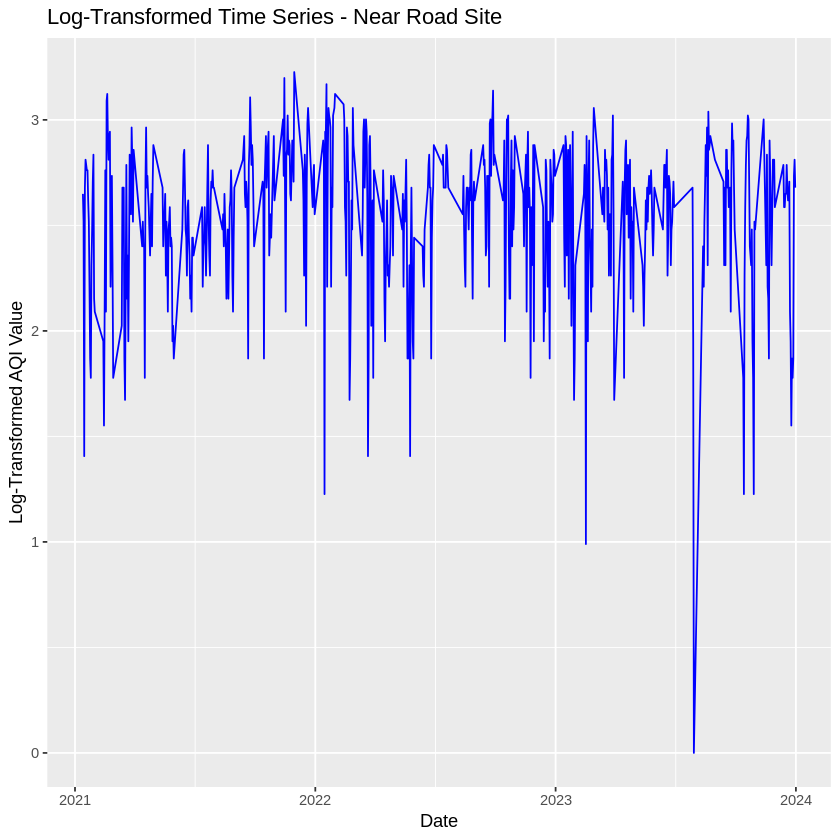

In [ ]:
# Apply the logarithm transformation directly on the Box-Cox transformed data since it helps to stabilize the variance
near_road_data$Log_Transformed_AQI <- log(abs(near_road_data$transformed_AQI) + 1) * sign(near_road_data$transformed_AQI)

# Plot the log-transformed data to visualize
ggplot(near_road_data, aes(x = Date, y = Log_Transformed_AQI)) +
  geom_line(color = "blue") +
  labs(title = "Log-Transformed Time Series - Near Road Site", x = "Date", y = "Log-Transformed AQI Value")

In [ ]:
# Update the transformed_AQI with the log-transformed differenced data
near_road_data$transformed_AQI <- near_road_data$Log_Transformed_AQI

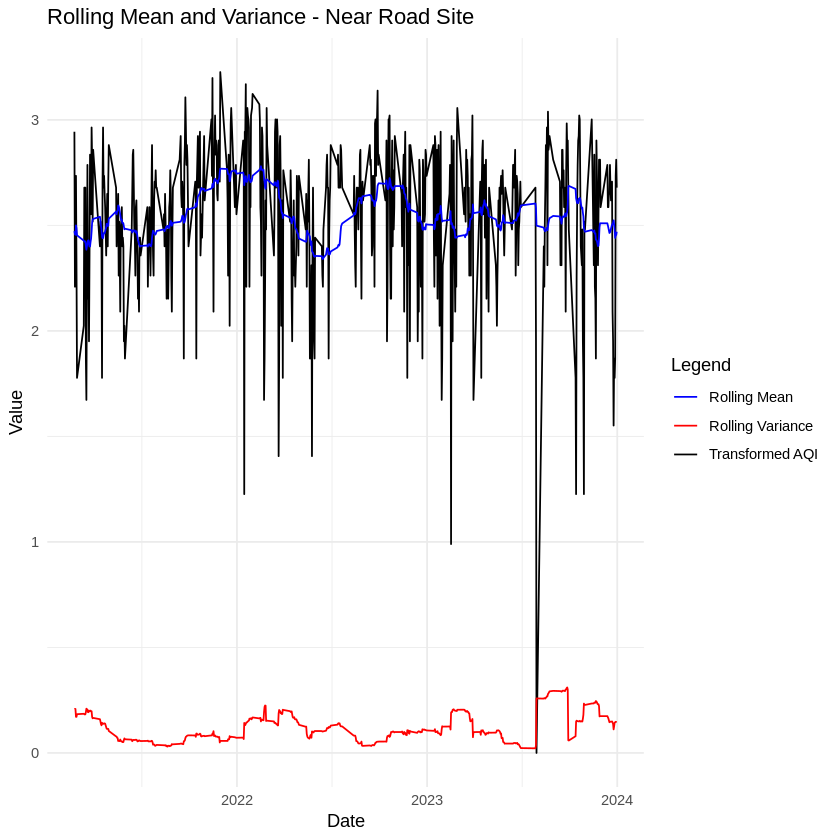

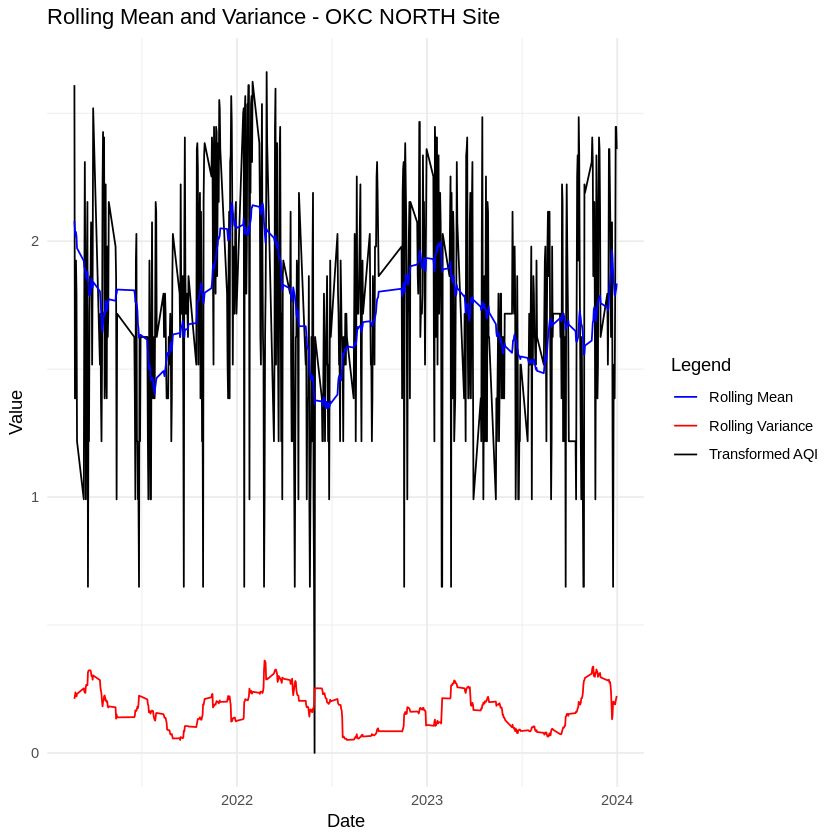

In [ ]:
# check mean and variance again
# Set the window size (e.g., 30 days)
window_size <- 30

# Apply rolling statistics on the transformed data
near_road_rolling_stats <- calculate_rolling_stats(near_road_data$transformed_AQI, window_size)
okc_north_rolling_stats <- calculate_rolling_stats(okc_north_data$transformed_AQI, window_size)

# Plot Rolling Mean and Variance for Near Road site
plot_rolling_stats(near_road_data, near_road_rolling_stats, "Near Road Site")

# Plot Rolling Mean and Variance for OKC NORTH site
plot_rolling_stats(okc_north_data, okc_north_rolling_stats, "OKC NORTH Site")

In [ ]:
# Calculate correlation for Near Road site
correlations_near_road <- cor(near_road_data[, c(meteorological_vars, "transformed_AQI")], use = "complete.obs")["transformed_AQI", meteorological_vars]

# Calculate correlation for OKC NORTH site
correlations_okc_north <- cor(okc_north_data[, c(meteorological_vars, "transformed_AQI")], use = "complete.obs")["transformed_AQI", meteorological_vars]


# Correlation coefficients
cat("\nCorrelation Coefficients with Transformed AQI (Near Road):\n")
print(correlations_near_road)

cat("\nCorrelation Coefficients with Transformed AQI (OKC NORTH):\n")
print(correlations_okc_north)


Correlation Coefficients with Transformed AQI (Near Road):
            temp           precip        windspeed       cloudcover 
      0.07847770      -0.19355988      -0.32647524      -0.47317424 
        humidity       visibility   solarradiation sealevelpressure 
     -0.36094715       0.25017622       0.15470544       0.09045569 
             dew 
     -0.06404710 

Correlation Coefficients with Transformed AQI (OKC NORTH):
            temp           precip        windspeed       cloudcover 
     -0.32500553      -0.20579095      -0.30996411      -0.41346950 
        humidity       visibility   solarradiation sealevelpressure 
     -0.29679669       0.10432930      -0.08710072       0.33197052 
             dew 
     -0.42084072 


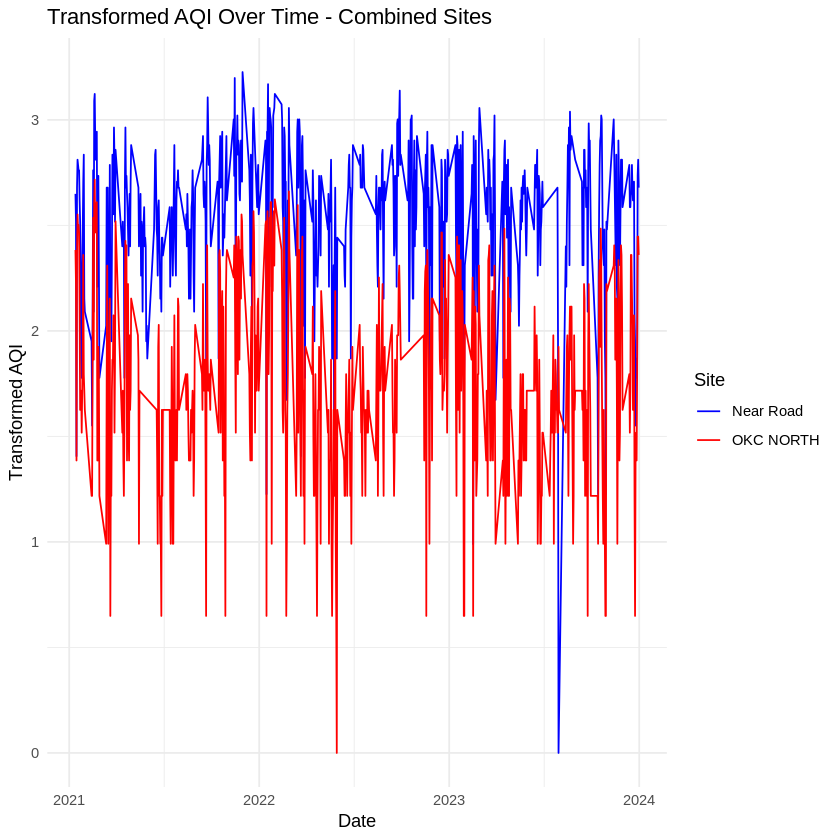

In [ ]:
# Combine the transformed AQI for both sites for plotting
combined_data_aqi <- rbind(
  data.frame(Date = near_road_data$Date, AQI = near_road_data$transformed_AQI, Site = "Near Road"),
  data.frame(Date = okc_north_data$Date, AQI = okc_north_data$transformed_AQI, Site = "OKC NORTH")
)

# Plot the transformed AQI over time for both sites without normalization
ggplot(combined_data_aqi, aes(x = Date, y = AQI, color = Site)) +
  geom_line() +
  labs(title = "Transformed AQI Over Time - Combined Sites", x = "Date", y = "Transformed AQI") +
  theme_minimal() +
  scale_color_manual(values = c("Near Road" = "blue", "OKC NORTH" = "red"))

In [ ]:
# Perform STL decomposition on daily data for each site separately

# Checking the length of data to set a proper frequency
n_obs_near_road <- nrow(near_road_data)
n_obs_okc_north <- nrow(okc_north_data)
print(paste("Length of site Near Road:", n_obs_near_road))
print(paste("Length of site OKC NORTH:", n_obs_okc_north))

[1] "Length of site Near Road: 606"
[1] "Length of site OKC NORTH: 611"


In [ ]:
# Set frequency to 52 to capture weekly seasonality
frequency_near_road <- 52
frequency_okc_north <- 52

# STL decomposition for Near Road site with weekly frequency
stl_decomp_near_road <- stl(ts(near_road_data$transformed_AQI, start = c(2021,1), frequency = frequency_near_road), s.window = "periodic", robust = TRUE)

# STL decomposition for OKC NORTH site with weekly frequency
stl_decomp_okc_north <- stl(ts(okc_north_data$transformed_AQI, start = c(2021,1), frequency = frequency_okc_north), s.window = "periodic", robust = TRUE)

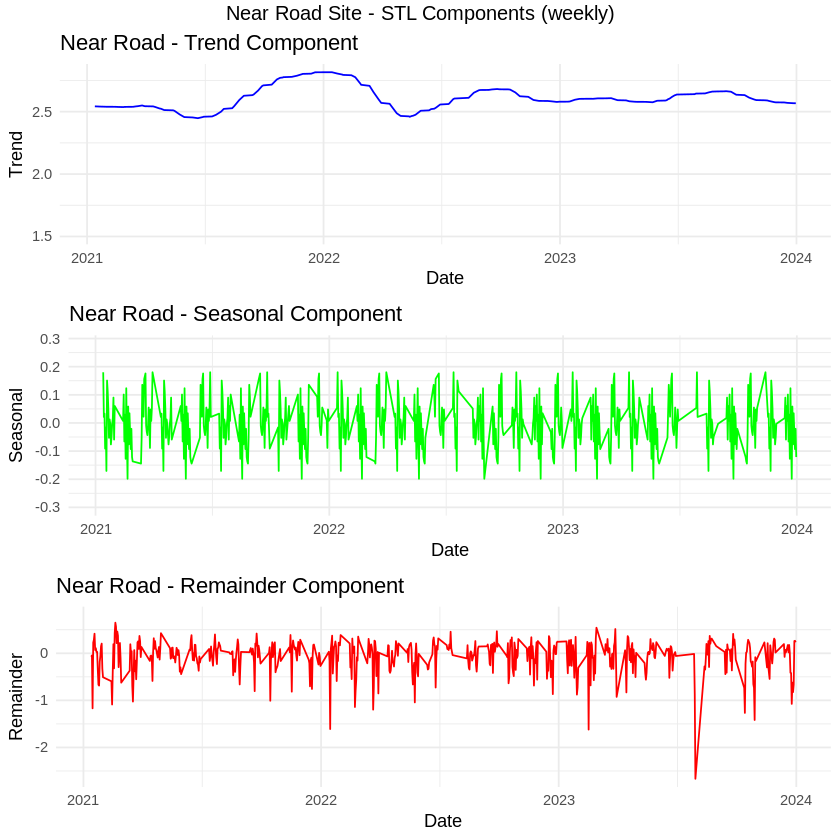

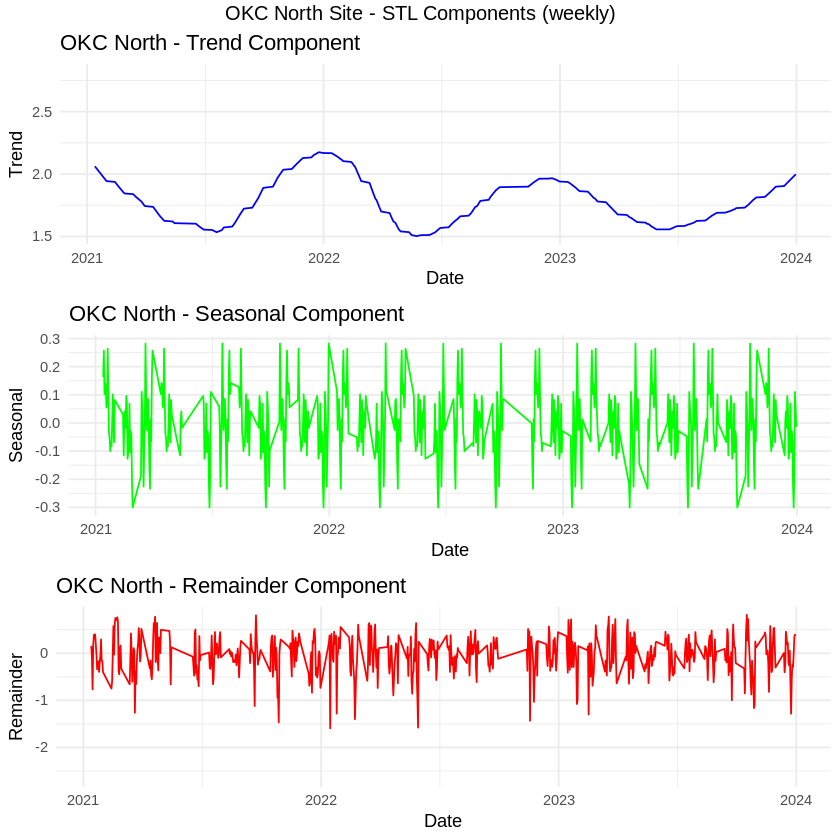

In [ ]:
# Extract the components from the STL object for Near Road site
near_road_data$Trend <- stl_decomp_near_road$time.series[, "trend"]
near_road_data$Seasonal <- stl_decomp_near_road$time.series[, "seasonal"]
near_road_data$Remainder <- stl_decomp_near_road$time.series[, "remainder"]

# Extract the components from the STL object for OKC North site
okc_north_data$Trend <- stl_decomp_okc_north$time.series[, "trend"]
okc_north_data$Seasonal <- stl_decomp_okc_north$time.series[, "seasonal"]
okc_north_data$Remainder <- stl_decomp_okc_north$time.series[, "remainder"]



# Define common y-limits for each component
y_limits_trend <- range(c(near_road_data$Trend, okc_north_data$Trend), na.rm = TRUE)
y_limits_seasonal <- range(c(near_road_data$Seasonal, okc_north_data$Seasonal), na.rm = TRUE)
y_limits_remainder <- range(c(near_road_data$Remainder, okc_north_data$Remainder), na.rm = TRUE)

# Create individual plots for Near Road site
near_road_trend_plot <- ggplot(near_road_data, aes(x = Date, y = Trend)) +
  geom_line(color = "blue") +
  labs(title = "Near Road - Trend Component", x = "Date", y = "Trend") +
  theme_minimal() +
  ylim(y_limits_trend)

near_road_seasonal_plot <- ggplot(near_road_data, aes(x = Date, y = Seasonal)) +
  geom_line(color = "green") +
  labs(title = "Near Road - Seasonal Component", x = "Date", y = "Seasonal") +
  theme_minimal() +
  ylim(y_limits_seasonal)

near_road_remainder_plot <- ggplot(near_road_data, aes(x = Date, y = Remainder)) +
  geom_line(color = "red") +
  labs(title = "Near Road - Remainder Component", x = "Date", y = "Remainder") +
  theme_minimal() +
  ylim(y_limits_remainder)

# Create individual plots for OKC North site
okc_north_trend_plot <- ggplot(okc_north_data, aes(x = Date, y = Trend)) +
  geom_line(color = "blue") +
  labs(title = "OKC North - Trend Component", x = "Date", y = "Trend") +
  theme_minimal() +
  ylim(y_limits_trend)

okc_north_seasonal_plot <- ggplot(okc_north_data, aes(x = Date, y = Seasonal)) +
  geom_line(color = "green") +
  labs(title = "OKC North - Seasonal Component", x = "Date", y = "Seasonal") +
  theme_minimal() +
  ylim(y_limits_seasonal)

okc_north_remainder_plot <- ggplot(okc_north_data, aes(x = Date, y = Remainder)) +
  geom_line(color = "red") +
  labs(title = "OKC North - Remainder Component", x = "Date", y = "Remainder") +
  theme_minimal() +
  ylim(y_limits_remainder)

# Combine plots for each site
grid.arrange(near_road_trend_plot, near_road_seasonal_plot, near_road_remainder_plot, ncol = 1, top = "Near Road Site - STL Components (weekly)")

grid.arrange(okc_north_trend_plot, okc_north_seasonal_plot, okc_north_remainder_plot, ncol = 1, top = "OKC North Site - STL Components (weekly)")

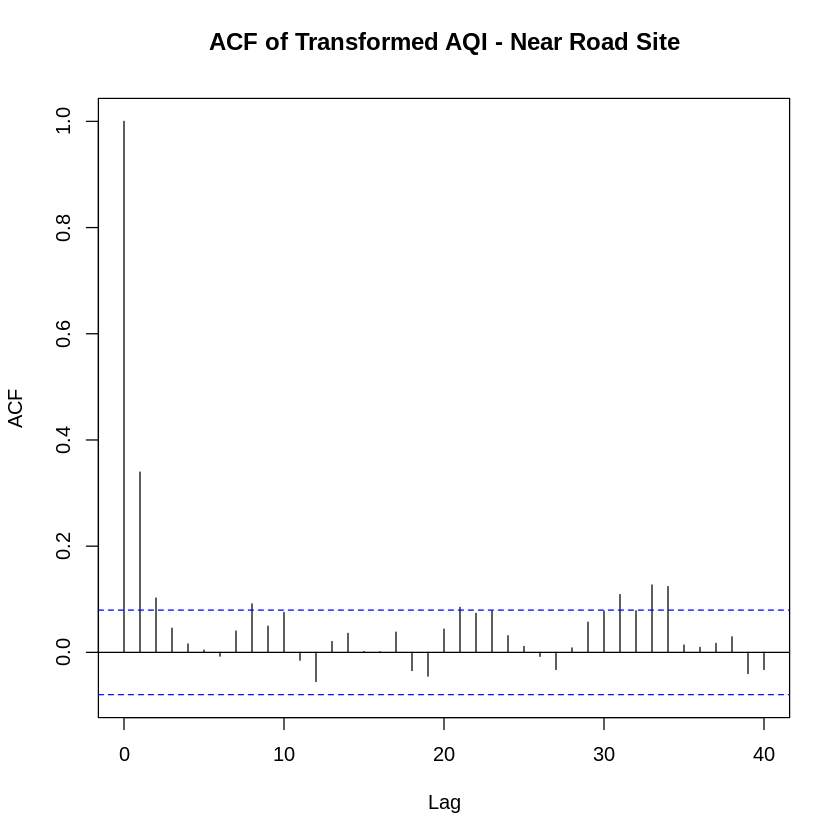

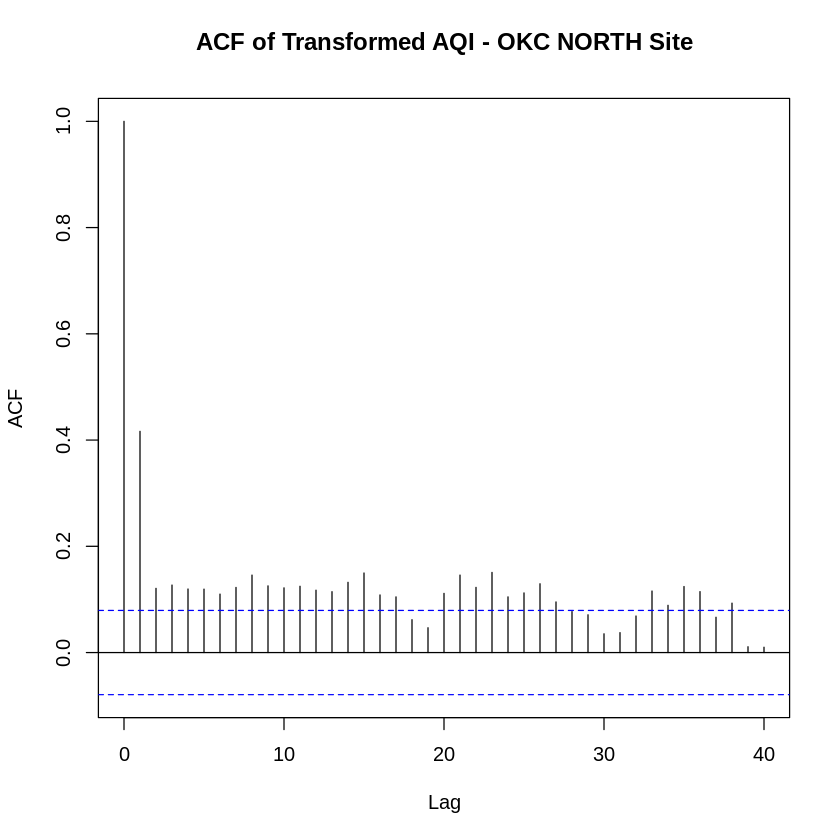

In [ ]:
# Function to plot ACF for a given dataset and title
plot_acf <- function(data, title) {
  acf(data, lag.max = 40, main = paste("ACF of Transformed AQI -", title))
}

# Plot ACF for the Near Road site
plot_acf(near_road_data$transformed_AQI, "Near Road Site")

# Plot ACF for the OKC NORTH site
plot_acf(okc_north_data$transformed_AQI, "OKC NORTH Site")

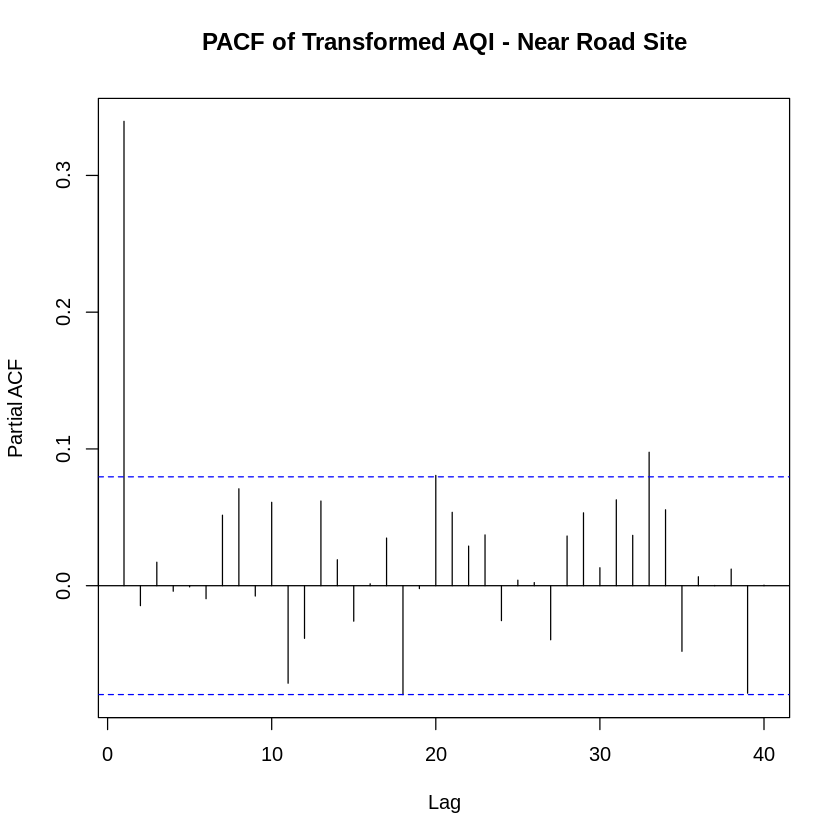

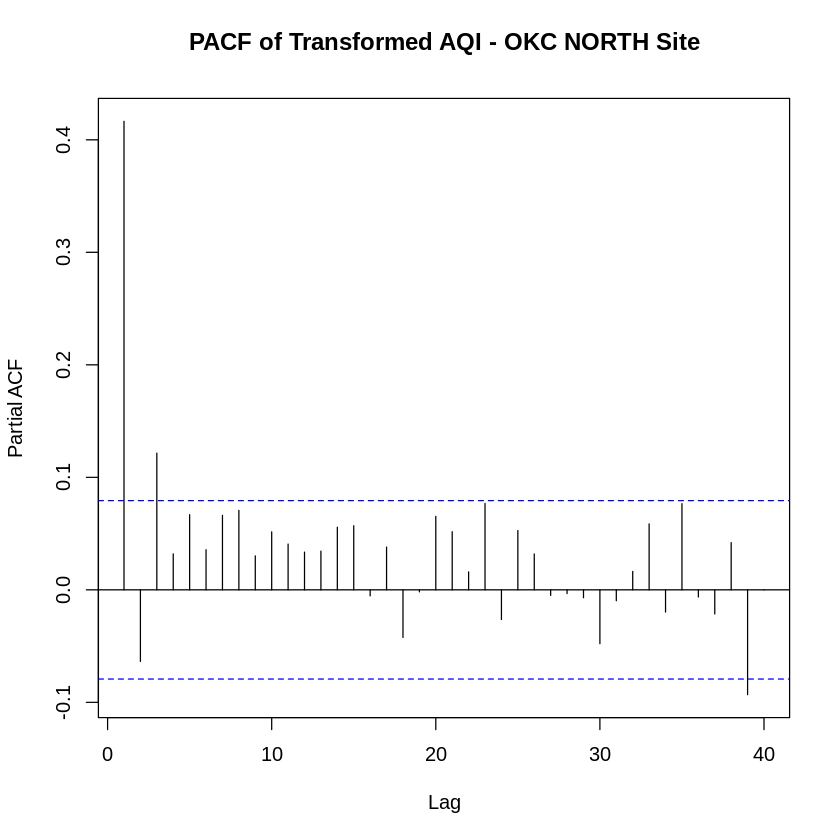

In [ ]:
# Plot PACF of the transformed data
# Function to plot PACF for a given dataset and title
plot_pacf <- function(data, title) {
  pacf(data, lag.max = 40, main = paste("PACF of Transformed AQI -", title))
}

# Plot PACF for the Near Road site
plot_pacf(near_road_data$transformed_AQI, "Near Road Site")

# Plot PACF for the OKC NORTH site
plot_pacf(okc_north_data$transformed_AQI, "OKC NORTH Site")

In [ ]:
##################### ARIMA Modeling #####################

# Exclude irrelevant variables and only keep the necessary ones for modeling

# Define the relevant variables, including actual AQI for later use
relevant_vars <- c("Date", "temp", "precip", "windspeed", "cloudcover", "humidity",
                   "visibility", "solarradiation", "sealevelpressure", "dew",
                   "transformed_AQI", "Daily.AQI.Value")

# Create a single dataset for each site using relevant variables
near_road_data <- near_road_data[, relevant_vars]
okc_north_data <- okc_north_data[, relevant_vars]

In [ ]:
# Rename 'transformed_AQI' to 'AQI_for_modeling' for consistency
colnames(near_road_data)[colnames(near_road_data) == "transformed_AQI"] <- "AQI_for_modeling"
colnames(okc_north_data)[colnames(okc_north_data) == "transformed_AQI"] <- "AQI_for_modeling"

In [ ]:
# Split data into training and test sets (80/20 split) for each site separately

# Near Road site
train_size_near_road <- floor(0.8 * nrow(near_road_data))
train_data_near_road <- near_road_data[1:train_size_near_road, !colnames(near_road_data) %in% "Daily.AQI.Value"]
test_data_near_road <- near_road_data[(train_size_near_road + 1):nrow(near_road_data), ]

# OKC NORTH site
train_size_okc_north <- floor(0.8 * nrow(okc_north_data))
train_data_okc_north <- okc_north_data[1:train_size_okc_north, !colnames(okc_north_data) %in% "Daily.AQI.Value"]
test_data_okc_north <- okc_north_data[(train_size_okc_north + 1):nrow(okc_north_data), ]

# Print the start and end dates of the training and test sets for each site

# Near Road site
cat("\nNear Road Site - Training set starts at:", as.character(head(train_data_near_road$Date, 1)), "\n")
cat("Near Road Site - Training set ends at:", as.character(tail(train_data_near_road$Date, 1)), "\n")
cat("Near Road Site - Test set starts at:", as.character(head(test_data_near_road$Date, 1)), "\n")
cat("Near Road Site - Test set ends at:", as.character(tail(test_data_near_road$Date, 1)), "\n")

# OKC NORTH site
cat("\nOKC NORTH Site - Training set starts at:", as.character(head(train_data_okc_north$Date, 1)), "\n")
cat("OKC NORTH Site - Training set ends at:", as.character(tail(train_data_okc_north$Date, 1)), "\n")
cat("OKC NORTH Site - Test set starts at:", as.character(head(test_data_okc_north$Date, 1)), "\n")
cat("OKC NORTH Site - Test set ends at:", as.character(tail(test_data_okc_north$Date, 1)), "\n")


Near Road Site - Training set starts at: 2021-01-13 
Near Road Site - Training set ends at: 2023-04-29 
Near Road Site - Test set starts at: 2023-04-30 
Near Road Site - Test set ends at: 2023-12-31 

OKC NORTH Site - Training set starts at: 2021-01-13 
OKC NORTH Site - Training set ends at: 2023-06-18 
OKC NORTH Site - Test set starts at: 2023-06-19 
OKC NORTH Site - Test set ends at: 2023-12-31 


In [ ]:
# Exogenous variables for ARIMA model - focusing on Near Road site
exogenous_vars_near_road <- c("temp",           # Mean daily temperature
                              "precip",         # Precipitation - relevant for AQI as weather impacts air quality
                              "windspeed",      # Wind speed - impacts the dispersion of pollutants
                              "cloudcover",     # Cloud cover - influences temperature and radiation, affecting AQI
                              "humidity",       # Humidity - can interact with pollutants to affect air quality
                              "visibility",     # Visibility - often related to air pollution levels
                              "solarradiation", # Solar radiation - affects temperature and pollutant dispersion
                              "sealevelpressure", # Sea level pressure - can influence weather patterns and AQI
                              "dew")            # Dew point - relevant as it affects humidity and overall air quality

# Exogenous variables for ARIMA model - focusing on OKC NORTH site
exogenous_vars_okc_north <- c("temp",           # Mean daily temperature
                              "precip",         # Precipitation - relevant for AQI as weather impacts air quality
                              "windspeed",      # Wind speed - impacts the dispersion of pollutants
                              "cloudcover",     # Cloud cover - influences temperature and radiation, affecting AQI
                              "humidity",       # Humidity - can interact with pollutants to affect air quality
                              "visibility",     # Visibility - often related to air pollution levels
                              "solarradiation", # Solar radiation - affects temperature and pollutant dispersion
                              "sealevelpressure", # Sea level pressure - can influence weather patterns and AQI
                              "dew")            # Dew point - relevant as it affects humidity and overall air quality


In [ ]:
#Compute the Correlation Matrix to check multicollinearity

# Subset the data to include only the exogenous variables
exog_data <- merged_data[, exogenous_vars_near_road]

# Compute the correlation matrix
cor_matrix <- cor(exog_data)

# Print the correlation matrix
print(cor_matrix)

                         temp       precip   windspeed  cloudcover    humidity
temp              1.000000000  0.001483026 -0.17592980 -0.20434747 -0.02432197
precip            0.001483026  1.000000000  0.11159627  0.42257852  0.41130238
windspeed        -0.175929800  0.111596272  1.00000000  0.23409143 -0.02257205
cloudcover       -0.204347465  0.422578519  0.23409143  1.00000000  0.64267067
humidity         -0.024321973  0.411302380 -0.02257205  0.64267067  1.00000000
visibility        0.263947927 -0.344830821 -0.05297170 -0.51898423 -0.55184706
solarradiation    0.613943531 -0.246049303 -0.20148333 -0.55717467 -0.33983363
sealevelpressure -0.566957775 -0.139431850 -0.30787530 -0.10486552 -0.13625094
dew               0.931713618  0.138540170 -0.16982166  0.03403043  0.33504973
                   visibility solarradiation sealevelpressure         dew
temp              0.263947927      0.6139435     -0.566957775  0.93171362
precip           -0.344830821     -0.2460493     -0.139431850 

In [ ]:
#Now, finalizing the Exogenous variables excuding "dew" for high Correlation with "temp"

# Exogenous variables for ARIMA model - focusing on Near Road site
exogenous_vars_near_road <- c("temp",           # Mean daily temperature
                              "precip",         # Precipitation - relevant for AQI as weather impacts air quality
                              "windspeed",      # Wind speed - impacts the dispersion of pollutants
                              "cloudcover",     # Cloud cover - influences temperature and radiation, affecting AQI
                              "humidity",       # Humidity - can interact with pollutants to affect air quality
                              "visibility",     # Visibility - often related to air pollution levels
                              "solarradiation", # Solar radiation - affects temperature and pollutant dispersion
                              "sealevelpressure") # Sea level pressure - can influence weather patterns and AQI

# Exogenous variables for ARIMA model - focusing on OKC NORTH site
exogenous_vars_okc_north <- c("temp",           # Mean daily temperature
                              "precip",         # Precipitation - relevant for AQI as weather impacts air quality
                              "windspeed",      # Wind speed - impacts the dispersion of pollutants
                              "cloudcover",     # Cloud cover - influences temperature and radiation, affecting AQI
                              "humidity",       # Humidity - can interact with pollutants to affect air quality
                              "visibility",     # Visibility - often related to air pollution levels
                              "solarradiation", # Solar radiation - affects temperature and pollutant dispersion
                              "sealevelpressure") # Sea level pressure - can influence weather patterns and AQI


In [ ]:
# Fit ARIMA models on the training set using 'AQI_for_modeling' for Near Road site
model1_near_road <- Arima(train_data_near_road$AQI_for_modeling,
                          order = c(1, 0, 1),
                          xreg = as.matrix(train_data_near_road[, exogenous_vars_near_road]),
                          include.constant = TRUE)

model2_near_road <- Arima(train_data_near_road$AQI_for_modeling,
                          order = c(0, 0, 1),
                          xreg = as.matrix(train_data_near_road[, exogenous_vars_near_road]),
                          include.constant = TRUE)

model3_near_road <- Arima(train_data_near_road$AQI_for_modeling,
                          order = c(1, 0, 0),
                          xreg = as.matrix(train_data_near_road[, exogenous_vars_near_road]),
                          include.constant = TRUE)

# Fit ARIMA models on the training set using 'AQI_for_modeling' for OKC NORTH site
model1_okc_north <- Arima(train_data_okc_north$AQI_for_modeling,
                          order = c(1, 0, 1),
                          xreg = as.matrix(train_data_okc_north[, exogenous_vars_okc_north]),
                          include.constant = TRUE)

model2_okc_north <- Arima(train_data_okc_north$AQI_for_modeling,
                          order = c(0, 0, 1),
                          xreg = as.matrix(train_data_okc_north[, exogenous_vars_okc_north]),
                          include.constant = TRUE)

model3_okc_north <- Arima(train_data_okc_north$AQI_for_modeling,
                          order = c(1, 0, 0),
                          xreg = as.matrix(train_data_okc_north[, exogenous_vars_okc_north]),
                          include.constant = TRUE)

# Print model summaries for Near Road site
cat("\nNear Road Site - Model 1 Summary:\n")
summary(model1_near_road)

cat("\nNear Road Site - Model 2 Summary:\n")
summary(model2_near_road)

cat("\nNear Road Site - Model 3 Summary:\n")
summary(model3_near_road)

# Print model summaries for OKC NORTH site
cat("\nOKC NORTH Site - Model 1 Summary:\n")
summary(model1_okc_north)

cat("\nOKC NORTH Site - Model 2 Summary:\n")
summary(model2_okc_north)

cat("\nOKC NORTH Site - Model 3 Summary:\n")
summary(model3_okc_north)


Near Road Site - Model 1 Summary:


Series: train_data_near_road$AQI_for_modeling 
Regression with ARIMA(1,0,1) errors 

Coefficients:
          ar1     ma1  intercept    temp  precip  windspeed  cloudcover
      -0.1437  0.3530     6.3251  0.0024  0.0017    -0.0106     -0.0061
s.e.   0.2492  0.2374     2.7885  0.0023  0.0019     0.0016      0.0007
      humidity  visibility  solarradiation  sealevelpressure
       -0.0045     -0.0049         -0.0011           -0.0027
s.e.    0.0014      0.0107          0.0002            0.0027

sigma^2 = 0.0713:  log likelihood = -42.15
AIC=108.3   AICc=108.96   BIC=158.49

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set 5.358579e-05 0.2639745 0.1951389 -1.436256 8.510584 0.6725389
                    ACF1
Training set 0.002646618


Near Road Site - Model 2 Summary:


Series: train_data_near_road$AQI_for_modeling 
Regression with ARIMA(0,0,1) errors 

Coefficients:
         ma1  intercept    temp  precip  windspeed  cloudcover  humidity
      0.2142     6.5807  0.0024  0.0018    -0.0108     -0.0061   -0.0046
s.e.  0.0470     2.7715  0.0023  0.0019     0.0015      0.0007    0.0014
      visibility  solarradiation  sealevelpressure
         -0.0049         -0.0011           -0.0029
s.e.      0.0107          0.0002            0.0027

sigma^2 = 0.07119:  log likelihood = -42.29
AIC=106.58   AICc=107.14   BIC=152.59

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set 3.063699e-05 0.2640523 0.1947116 -1.437285 8.495845 0.6710663
                     ACF1
Training set -0.003289845


Near Road Site - Model 3 Summary:


Series: train_data_near_road$AQI_for_modeling 
Regression with ARIMA(1,0,0) errors 

Coefficients:
         ar1  intercept    temp  precip  windspeed  cloudcover  humidity
      0.2021     6.9821  0.0024  0.0019    -0.0111     -0.0061   -0.0046
s.e.  0.0462     2.7766  0.0024  0.0019     0.0015      0.0007    0.0014
      visibility  solarradiation  sealevelpressure
         -0.0047         -0.0011           -0.0033
s.e.      0.0108          0.0002            0.0027

sigma^2 = 0.07134:  log likelihood = -42.79
AIC=107.58   AICc=108.14   BIC=153.59

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE      MASE
Training set 2.30718e-06 0.2643269 0.1948087 -1.439839 8.502241 0.6714009
                    ACF1
Training set 0.005958219


OKC NORTH Site - Model 1 Summary:


Series: train_data_okc_north$AQI_for_modeling 
Regression with ARIMA(1,0,1) errors 

Coefficients:
          ar1     ma1  intercept     temp  precip  windspeed  cloudcover
      -0.0515  0.2633    11.2382  -0.0172  0.0013    -0.0153     -0.0089
s.e.   0.2269  0.2210     3.4885   0.0029  0.0024     0.0020      0.0009
      humidity  visibility  solarradiation  sealevelpressure
       -0.0028     -0.0125         -0.0013           -0.0077
s.e.    0.0017      0.0134          0.0003            0.0034

sigma^2 = 0.1121:  log likelihood = -152.99
AIC=329.98   AICc=330.64   BIC=380.26

Training set error measures:
                        ME      RMSE       MAE MPE MAPE      MASE         ACF1
Training set -2.119806e-05 0.3310507 0.2557997 Inf  Inf 0.6871765 0.0005799413


OKC NORTH Site - Model 2 Summary:


Series: train_data_okc_north$AQI_for_modeling 
Regression with ARIMA(0,0,1) errors 

Coefficients:
         ma1  intercept     temp  precip  windspeed  cloudcover  humidity
      0.2137    11.3006  -0.0173  0.0013    -0.0154     -0.0089   -0.0028
s.e.  0.0463     3.4867   0.0029  0.0024     0.0020      0.0009    0.0017
      visibility  solarradiation  sealevelpressure
         -0.0126         -0.0013           -0.0078
s.e.      0.0134          0.0003            0.0034

sigma^2 = 0.1119:  log likelihood = -153.01
AIC=328.03   AICc=328.58   BIC=374.12

Training set error measures:
                        ME      RMSE       MAE MPE MAPE     MASE         ACF1
Training set -3.002823e-05 0.3310681 0.2558546 Inf  Inf 0.687324 -0.001633645


OKC NORTH Site - Model 3 Summary:


Series: train_data_okc_north$AQI_for_modeling 
Regression with ARIMA(1,0,0) errors 

Coefficients:
         ar1  intercept     temp  precip  windspeed  cloudcover  humidity
      0.2005    11.7378  -0.0175  0.0012    -0.0158      -9e-03   -0.0026
s.e.  0.0453     3.4848   0.0029  0.0024     0.0019       9e-04    0.0017
      visibility  solarradiation  sealevelpressure
         -0.0127         -0.0013           -0.0082
s.e.      0.0135          0.0003            0.0034

sigma^2 = 0.1122:  log likelihood = -153.56
AIC=329.13   AICc=329.68   BIC=375.22

Training set error measures:
                        ME      RMSE       MAE MPE MAPE      MASE        ACF1
Training set -7.204617e-05 0.3314424 0.2561426 Inf  Inf 0.6880977 0.008314743


Checking residuals for Near Road Site models...

	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,1) errors
Q* = 13.528, df = 8, p-value = 0.09493

Model df: 2.   Total lags used: 10



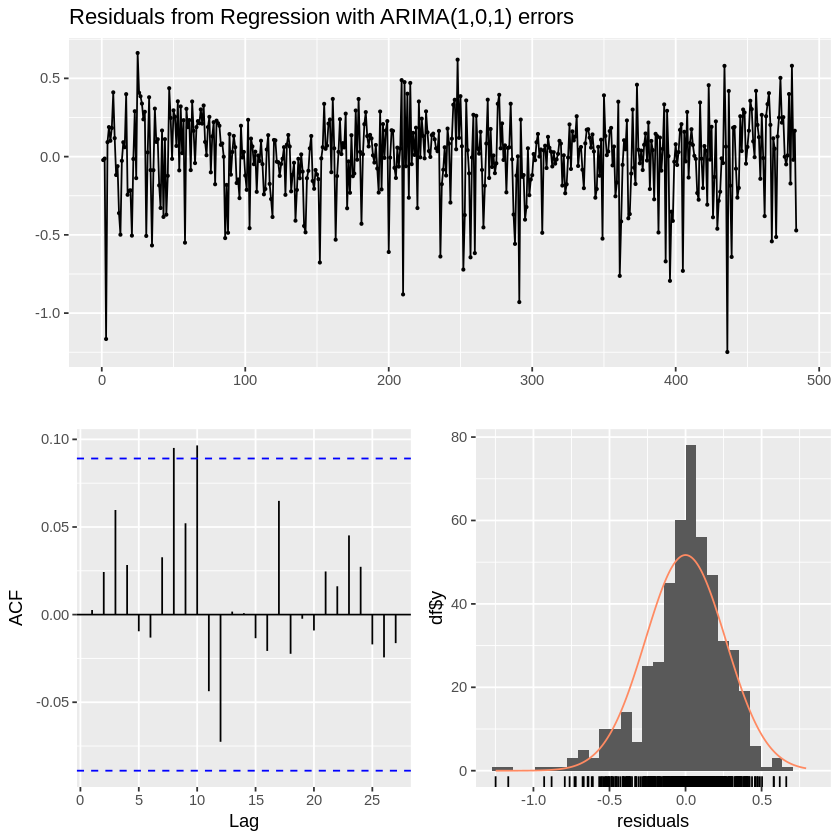


	Ljung-Box test

data:  Residuals from Regression with ARIMA(0,0,1) errors
Q* = 13.642, df = 9, p-value = 0.1356

Model df: 1.   Total lags used: 10



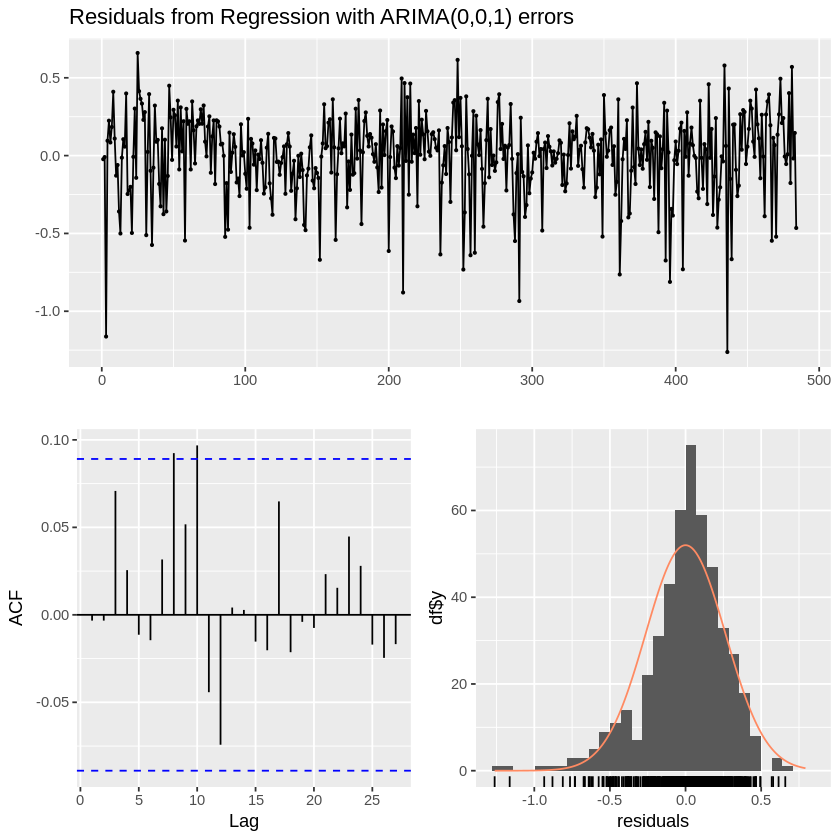


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,0) errors
Q* = 14.924, df = 9, p-value = 0.09306

Model df: 1.   Total lags used: 10


Checking residuals for OKC NORTH Site models...


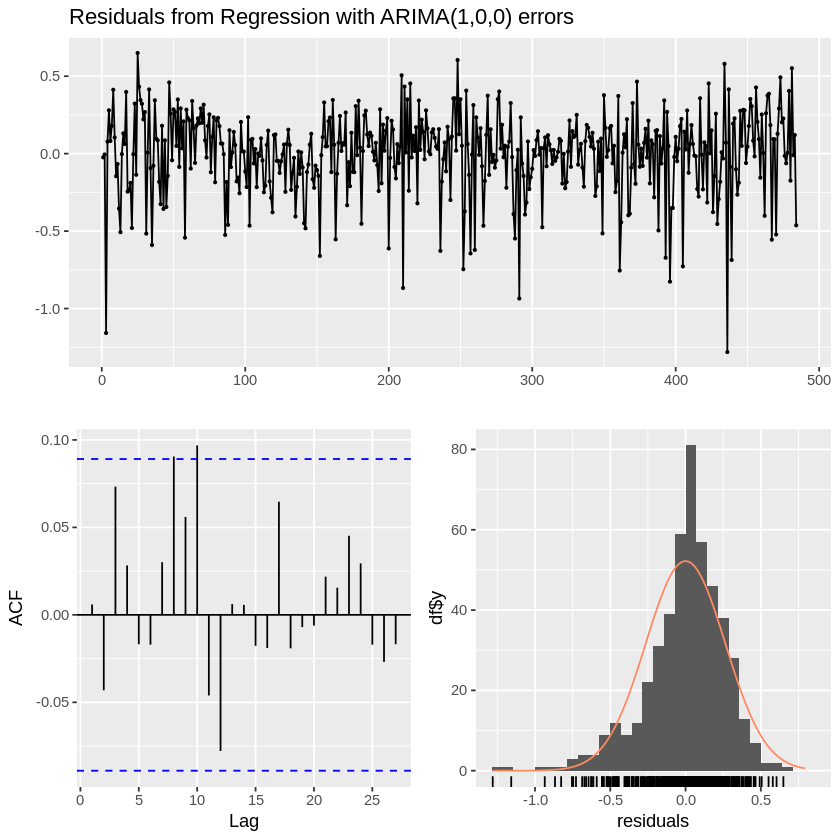


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,1) errors
Q* = 2.4498, df = 8, p-value = 0.964

Model df: 2.   Total lags used: 10



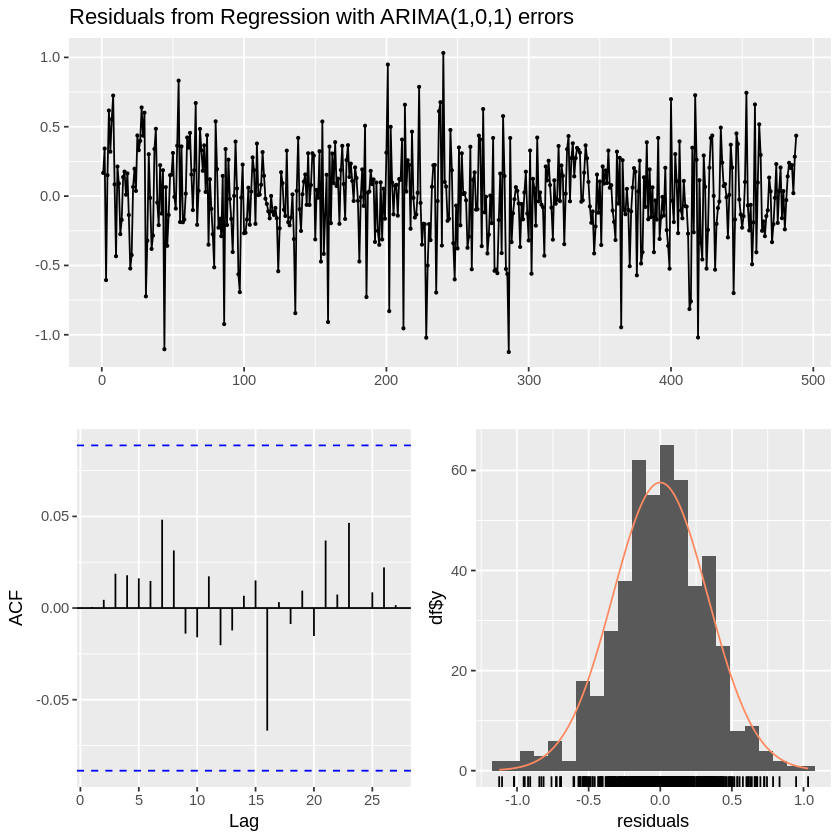


	Ljung-Box test

data:  Residuals from Regression with ARIMA(0,0,1) errors
Q* = 2.4775, df = 9, p-value = 0.9815

Model df: 1.   Total lags used: 10



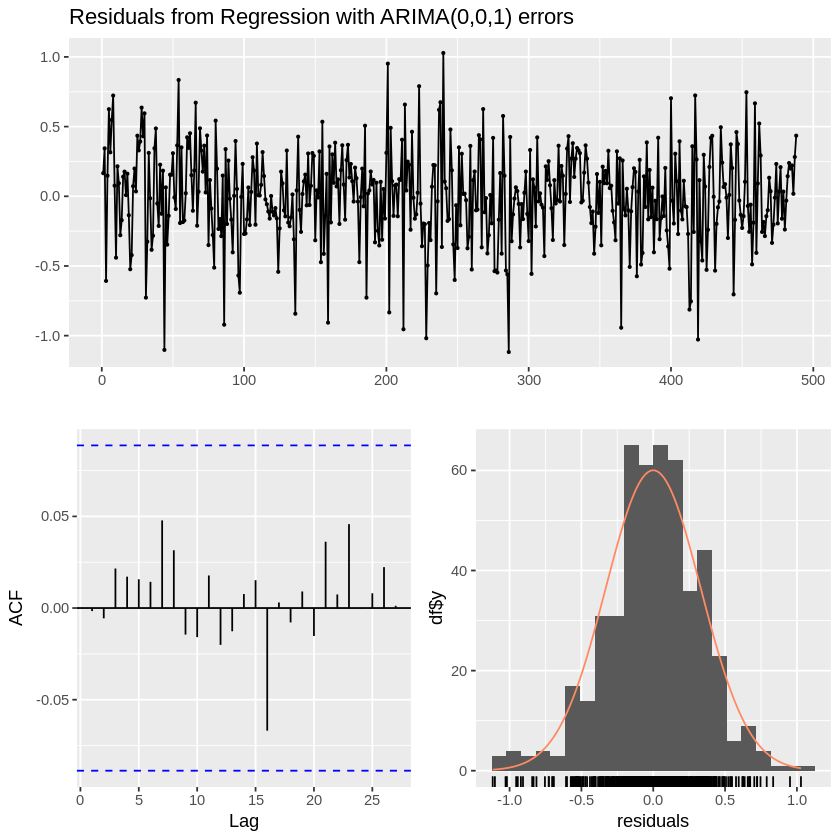


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,0) errors
Q* = 3.4967, df = 9, p-value = 0.9413

Model df: 1.   Total lags used: 10


Near Road Site - AIC and BIC values:
AIC(model1_near_road): 108.3004 
BIC(model1_near_road): 158.4854 
AIC(model2_near_road): 106.583 
BIC(model2_near_road): 152.5859 
AIC(model3_near_road): 107.5836 
BIC(model3_near_road): 153.5866 

OKC NORTH Site - AIC and BIC values:
AIC(model1_okc_north): 329.979 
BIC(model1_okc_north): 380.2628 
AIC(model2_okc_north): 328.0299 
BIC(model2_okc_north): 374.1234 
AIC(model3_okc_north): 329.1272 
BIC(model3_okc_north): 375.2206 


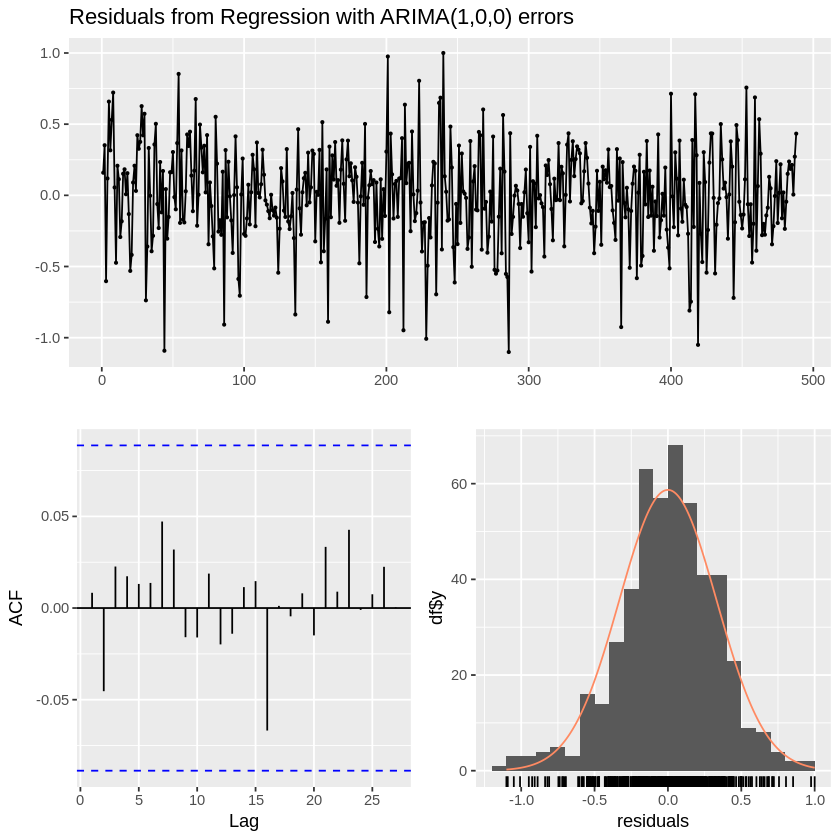

In [ ]:
# Check residuals for each model for Near Road site
cat("\nChecking residuals for Near Road Site models...\n")
checkresiduals(model1_near_road)
checkresiduals(model2_near_road)
checkresiduals(model3_near_road)

# Check residuals for each model for OKC NORTH site
cat("\nChecking residuals for OKC NORTH Site models...\n")
checkresiduals(model1_okc_north)
checkresiduals(model2_okc_north)
checkresiduals(model3_okc_north)

# Compare AIC and BIC values for Near Road site and choose the model with the lowest values
cat("\nNear Road Site - AIC and BIC values:\n")
cat("AIC(model1_near_road):", AIC(model1_near_road), "\n")
cat("BIC(model1_near_road):", BIC(model1_near_road), "\n")

cat("AIC(model2_near_road):", AIC(model2_near_road), "\n")
cat("BIC(model2_near_road):", BIC(model2_near_road), "\n")

cat("AIC(model3_near_road):", AIC(model3_near_road), "\n")
cat("BIC(model3_near_road):", BIC(model3_near_road), "\n")

# Compare AIC and BIC values for OKC NORTH site and choose the model with the lowest values
cat("\nOKC NORTH Site - AIC and BIC values:\n")
cat("AIC(model1_okc_north):", AIC(model1_okc_north), "\n")
cat("BIC(model1_okc_north):", BIC(model1_okc_north), "\n")

cat("AIC(model2_okc_north):", AIC(model2_okc_north), "\n")
cat("BIC(model2_okc_north):", BIC(model2_okc_north), "\n")

cat("AIC(model3_okc_north):", AIC(model3_okc_north), "\n")
cat("BIC(model3_okc_north):", BIC(model3_okc_north), "\n")



Near Road Site - Auto ARIMA Model Summary:


Series: train_data_near_road$AQI_for_modeling 
Regression with ARIMA(0,0,1) errors 

Coefficients:
         ma1  intercept    temp  precip  windspeed  cloudcover  humidity
      0.2142     6.5807  0.0024  0.0018    -0.0108     -0.0061   -0.0046
s.e.  0.0470     2.7715  0.0023  0.0019     0.0015      0.0007    0.0014
      visibility  solarradiation  sealevelpressure
         -0.0049         -0.0011           -0.0029
s.e.      0.0107          0.0002            0.0027

sigma^2 = 0.07119:  log likelihood = -42.29
AIC=106.58   AICc=107.14   BIC=152.59

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set 3.063699e-05 0.2640523 0.1947116 -1.437285 8.495845 0.6710663
                     ACF1
Training set -0.003289845


Near Road Site - Auto ARIMA Model Residuals Check:

	Ljung-Box test

data:  Residuals from Regression with ARIMA(0,0,1) errors
Q* = 13.642, df = 9, p-value = 0.1356

Model df: 1.   Total lags used: 10


OKC NORTH Site - Auto ARIMA Model Summary:


Series: train_data_okc_north$AQI_for_modeling 
Regression with ARIMA(0,0,1) errors 

Coefficients:
         ma1  intercept     temp  precip  windspeed  cloudcover  humidity
      0.2137    11.3006  -0.0173  0.0013    -0.0154     -0.0089   -0.0028
s.e.  0.0463     3.4867   0.0029  0.0024     0.0020      0.0009    0.0017
      visibility  solarradiation  sealevelpressure
         -0.0126         -0.0013           -0.0078
s.e.      0.0134          0.0003            0.0034

sigma^2 = 0.1119:  log likelihood = -153.01
AIC=328.03   AICc=328.58   BIC=374.12

Training set error measures:
                        ME      RMSE       MAE MPE MAPE     MASE         ACF1
Training set -3.002823e-05 0.3310681 0.2558546 Inf  Inf 0.687324 -0.001633645


OKC NORTH Site - Auto ARIMA Model Residuals Check:


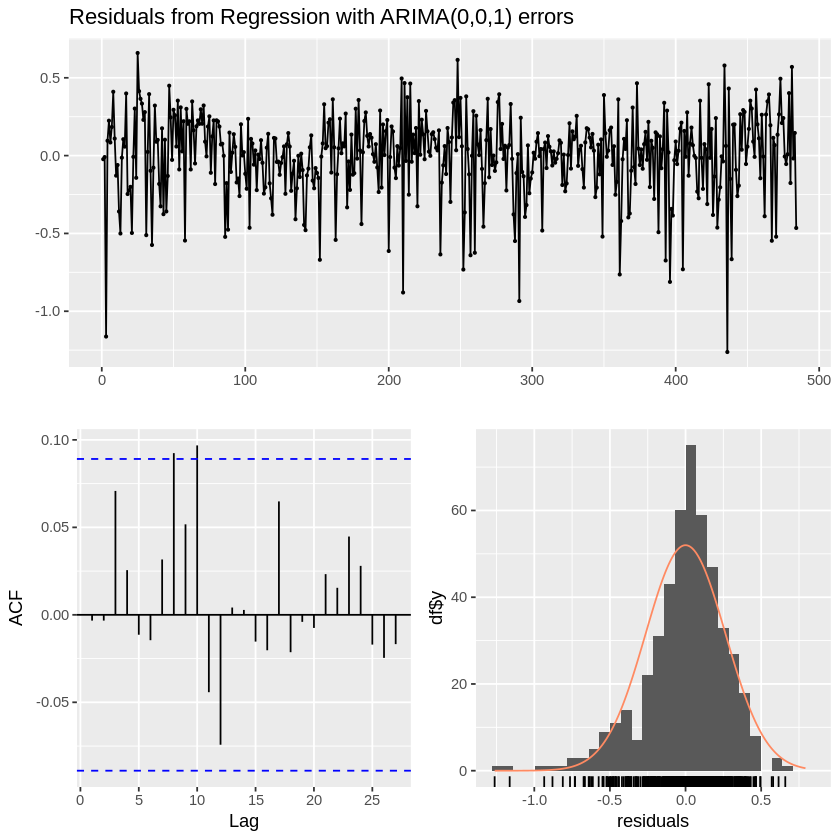


	Ljung-Box test

data:  Residuals from Regression with ARIMA(0,0,1) errors
Q* = 2.4775, df = 9, p-value = 0.9815

Model df: 1.   Total lags used: 10



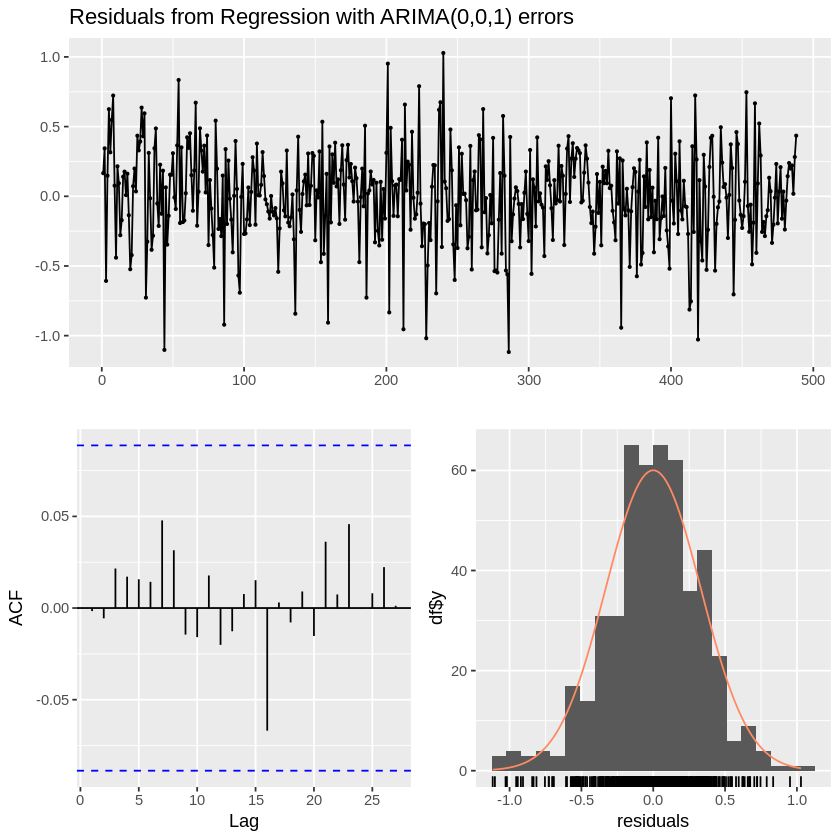

In [ ]:
# Fit ARIMA model using auto.arima with exogenous regressors for Near Road site
auto_model_near_road <- auto.arima(train_data_near_road$AQI_for_modeling,
                                   xreg = as.matrix(train_data_near_road[, exogenous_vars_near_road]),
                                   stepwise = FALSE,
                                   approximation = FALSE)

# Print the summary of the selected model for Near Road site
cat("\nNear Road Site - Auto ARIMA Model Summary:\n")
summary(auto_model_near_road)

# Check residuals of the selected model for Near Road site
cat("\nNear Road Site - Auto ARIMA Model Residuals Check:\n")
checkresiduals(auto_model_near_road)

# Fit ARIMA model using auto.arima with exogenous regressors for OKC NORTH site
auto_model_okc_north <- auto.arima(train_data_okc_north$AQI_for_modeling,
                                   xreg = as.matrix(train_data_okc_north[, exogenous_vars_okc_north]),
                                   stepwise = FALSE,
                                   approximation = FALSE)

# Print the summary of the selected model for OKC NORTH site
cat("\nOKC NORTH Site - Auto ARIMA Model Summary:\n")
summary(auto_model_okc_north)

# Check residuals of the selected model for OKC NORTH site
cat("\nOKC NORTH Site - Auto ARIMA Model Residuals Check:\n")
checkresiduals(auto_model_okc_north)

Forecast (Transformed Scale): 2.530998 2.269564 2.4873 2.294327 2.366785 2.617005 2.48899 
Actual (Transformed Scale): 2.678816 2.311148 2.209269 2.024238 2.261955 2.400714 2.618459 

Near Road Site - Forecast Accuracy Metrics (7 Days):
MAE: 0.17 
RMSE: 0.19 


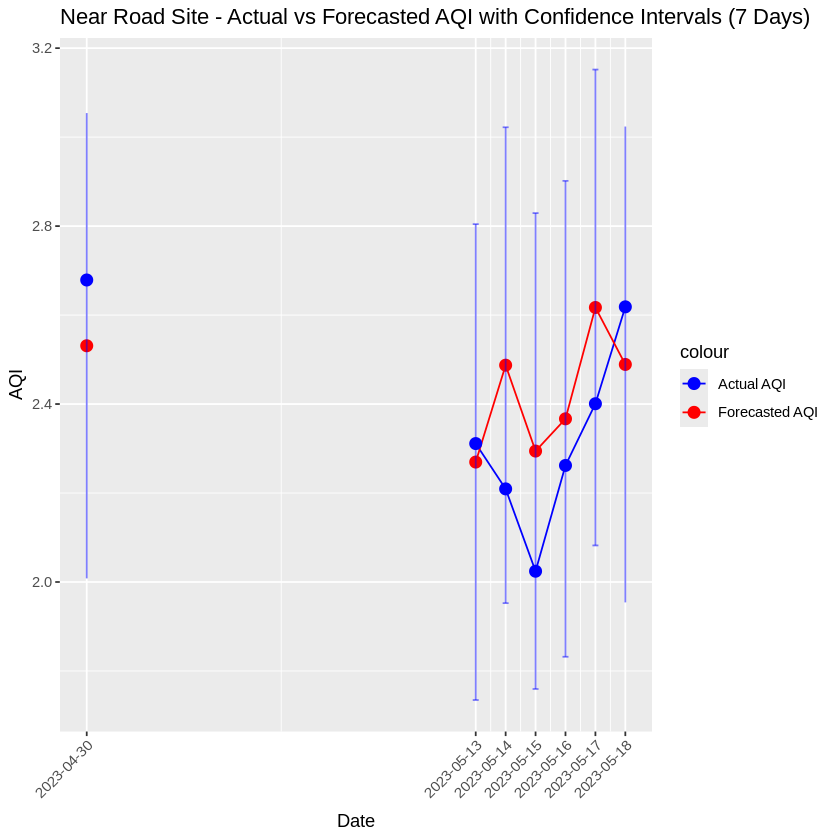

In [ ]:
################## Forecasting and Interpretation (Daily Forecasts) ################

# Forecast horizon (next 7 days)
h_daily <- 7

# Select the first 7 unique dates that are available in the test set
unique_dates_near_road_7_days <- unique(test_data_near_road$Date)[1:7]
# Filter the test data for these 7 unique dates
test_data_near_road_7_days <- test_data_near_road[test_data_near_road$Date %in% unique_dates_near_road_7_days, ]

# Create exogenous_data matrix for the test set (daily) for Near Road site
test_exog_data_near_road_7_days <- as.matrix(test_data_near_road_7_days[, exogenous_vars_near_road])

# Generate daily forecasts for the next 7 available days using the best model for Near Road site
forecast_result_near_road_7_days <- forecast(model2_near_road, h = nrow(test_exog_data_near_road_7_days), xreg = test_exog_data_near_road_7_days)

# Check for infinite values in forecast results and replace them with NA
forecast_result_near_road_7_days$upper[is.infinite(forecast_result_near_road_7_days$upper)] <- NA
forecast_result_near_road_7_days$lower[is.infinite(forecast_result_near_road_7_days$lower)] <- NA

# Extract forecasted values and confidence intervals for Near Road site
forecast_values_near_road_7_days <- as.numeric(forecast_result_near_road_7_days$mean)
lower_bound_near_road_7_days <- as.numeric(forecast_result_near_road_7_days$lower[, 2])
upper_bound_near_road_7_days <- as.numeric(forecast_result_near_road_7_days$upper[, 2])


# Since forecast values are already on the transformed scale, we directly compare the forecasted values using the transformed AQI
forecast_aqi_near_road_7_days <- forecast_values_near_road_7_days

# Extract the actual(transformed) AQI values from the 'AQI_for_modeling'
actual_aqi_near_road_7_days <- test_data_near_road_7_days$AQI_for_modeling


cat("Forecast (Transformed Scale):", forecast_aqi_near_road_7_days, "\n")
cat("Actual (Transformed Scale):", actual_aqi_near_road_7_days, "\n")


# Calculate MAE and RMSE for Near Road site
mae_near_road_7_days <- mean(abs(actual_aqi_near_road_7_days - forecast_aqi_near_road_7_days), na.rm = TRUE)
rmse_near_road_7_days <- sqrt(mean((actual_aqi_near_road_7_days - forecast_aqi_near_road_7_days)^2, na.rm = TRUE))

cat("\nNear Road Site - Forecast Accuracy Metrics (7 Days):\n")
cat("MAE:", round(mae_near_road_7_days, 2), "\n")
cat("RMSE:", round(rmse_near_road_7_days, 2), "\n")

# Create dataframe for plotting for Near Road site
forecast_df_near_road_7_days <- data.frame(
  Date = test_data_near_road_7_days$Date,  # Use dates from the test set
  Actual_AQI = actual_aqi_near_road_7_days,
  Forecasted_AQI = forecast_aqi_near_road_7_days,
  Lower_Bound = lower_bound_near_road_7_days,
  Upper_Bound = upper_bound_near_road_7_days
)

# Remove rows with NA values for plotting
forecast_df_near_road_7_days <- na.omit(forecast_df_near_road_7_days)


# Check for consecutive dates and group them
forecast_df_near_road_7_days <- forecast_df_near_road_7_days %>%
  arrange(Date) %>%
  mutate(Is_Consecutive = c(FALSE, diff(Date) == 1)) %>%
  mutate(Group = cumsum(!Is_Consecutive))  # Create groups of consecutive dates

# Plot actual and forecasted AQI with confidence intervals for Near Road site for 7 days
ggplot(forecast_df_near_road_7_days, aes(x = Date)) +
  # Plot lines only for groups with consecutive dates
  geom_line(data = subset(forecast_df_near_road_7_days, ave(Is_Consecutive, Group, FUN = sum) > 1),
            aes(y = Actual_AQI, color = "Actual AQI")) +
  geom_line(data = subset(forecast_df_near_road_7_days, ave(Is_Consecutive, Group, FUN = sum) > 1),
            aes(y = Forecasted_AQI, color = "Forecasted AQI")) +
  # Plot points for all dates
  geom_point(aes(y = Actual_AQI, color = "Actual AQI"), size = 3) +
  geom_point(aes(y = Forecasted_AQI, color = "Forecasted AQI"), size = 3) +
  geom_errorbar(aes(ymin = Lower_Bound, ymax = Upper_Bound), width = 0.2, color = "blue", alpha = 0.5) +  # Error bars for confidence intervals
  labs(title = "Near Road Site - Actual vs Forecasted AQI with Confidence Intervals (7 Days)",
       x = "Date", y = "AQI") +
  scale_color_manual(values = c("Actual AQI" = "blue", "Forecasted AQI" = "red")) +
  scale_x_date(limits = range(unique_dates_near_road_7_days),
               breaks = unique_dates_near_road_7_days,
               date_labels = "%Y-%m-%d") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Forecast (Transformed Scale): 1.848546 1.602698 1.322301 1.641929 1.619928 1.618473 1.64149 
Actual (Transformed Scale): 1.79495 0.9911539 1.218171 1.385879 1.863552 1.517706 0.9911539 

OKC NORTH Site - Forecast Accuracy Metrics (7 Days):
MAE: 0.29 
RMSE: 0.37 


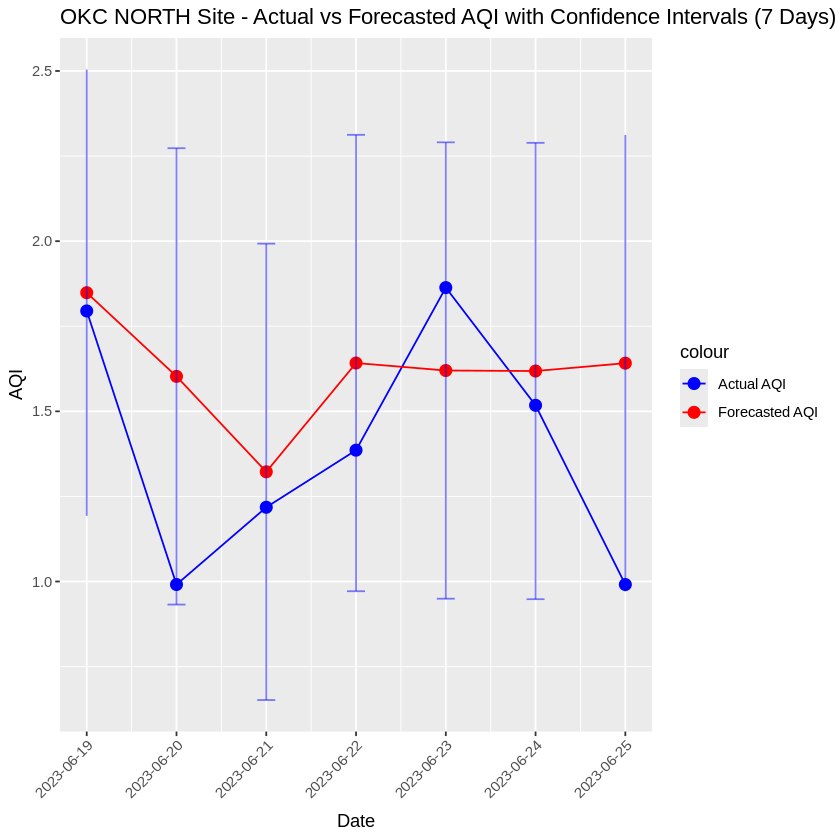

In [ ]:
############# OKC NORTH site ###############
# Forecast horizon (next 7 days)
h_daily <- 7

# Select the first 7 unique dates that are available in the test set
unique_dates_okc_north <- unique(test_data_okc_north$Date)[1:7]
# Filter the test data for these 7 unique dates
test_data_okc_north_7_days <- test_data_okc_north[test_data_okc_north$Date %in% unique_dates_okc_north, ]

# Create exogenous_data matrix for the test set (daily) for OKC NORTH site
test_exog_data_okc_north_7_days <- as.matrix(test_data_okc_north_7_days[, exogenous_vars_okc_north])

# Generate daily forecasts for the next 7 available days using the best model for OKC NORTH site
forecast_result_okc_north_7_days <- forecast(model2_okc_north, h = nrow(test_exog_data_okc_north_7_days), xreg = test_exog_data_okc_north_7_days)


# Check for infinite values in forecast results and replace them with NA
forecast_result_okc_north_7_days$upper[is.infinite(forecast_result_okc_north_7_days$upper)] <- NA
forecast_result_okc_north_7_days$lower[is.infinite(forecast_result_okc_north_7_days$lower)] <- NA

# Extract forecasted values and confidence intervals for OKC NORTH site
forecast_values_okc_north_7_days <- as.numeric(forecast_result_okc_north_7_days$mean)
lower_bound_okc_north_7_days <- as.numeric(forecast_result_okc_north_7_days$lower[, 2])
upper_bound_okc_north_7_days <- as.numeric(forecast_result_okc_north_7_days$upper[, 2])

#Since forecast values are already on the transformed scale, we directly compare the forecasted values using the transformed AQI
forecast_aqi_okc_north_7_days <- forecast_values_okc_north_7_days
cat("Forecast (Transformed Scale):", forecast_aqi_okc_north_7_days, "\n")

# Get actual(transformed) AQI values for the forecast period from the test set
actual_aqi_okc_north_7_days <- test_data_okc_north_7_days$AQI_for_modeling
cat("Actual (Transformed Scale):", actual_aqi_okc_north_7_days, "\n")

# Calculate MAE and RMSE for OKC NORTH site
mae_okc_north_7_days <- mean(abs(actual_aqi_okc_north_7_days - forecast_aqi_okc_north_7_days), na.rm = TRUE)
rmse_okc_north_7_days <- sqrt(mean((actual_aqi_okc_north_7_days - forecast_aqi_okc_north_7_days)^2, na.rm = TRUE))

cat("\nOKC NORTH Site - Forecast Accuracy Metrics (7 Days):\n")
cat("MAE:", round(mae_okc_north_7_days, 2), "\n")
cat("RMSE:", round(rmse_okc_north_7_days, 2), "\n")

# Create dataframe for plotting for OKC NORTH site
forecast_df_okc_north_7_days <- data.frame(
  Date = test_data_okc_north_7_days$Date,  # Use dates from the test set
  Actual_AQI = actual_aqi_okc_north_7_days,
  Forecasted_AQI = forecast_aqi_okc_north_7_days,
  Lower_Bound = lower_bound_okc_north_7_days,
  Upper_Bound = upper_bound_okc_north_7_days
)

# Remove rows with NA values for plotting
forecast_df_okc_north_7_days <- na.omit(forecast_df_okc_north_7_days)

# Check for consecutive dates and group them
forecast_df_okc_north_7_days <- forecast_df_okc_north_7_days %>%
  arrange(Date) %>%
  mutate(Is_Consecutive = c(FALSE, diff(Date) == 1)) %>%
  mutate(Group = cumsum(!Is_Consecutive))  # Create groups of consecutive dates

# Plot actual and forecasted AQI with confidence intervals for OKC NORTH site for 7 days
ggplot(forecast_df_okc_north_7_days, aes(x = Date)) +
  # Plot lines only for groups with consecutive dates
  geom_line(data = subset(forecast_df_okc_north_7_days, ave(Is_Consecutive, Group, FUN = sum) > 1),
            aes(y = Actual_AQI, color = "Actual AQI")) +
  geom_line(data = subset(forecast_df_okc_north_7_days, ave(Is_Consecutive, Group, FUN = sum) > 1),
            aes(y = Forecasted_AQI, color = "Forecasted AQI")) +
  # Plot points for all dates
  geom_point(aes(y = Actual_AQI, color = "Actual AQI"), size = 3) +
  geom_point(aes(y = Forecasted_AQI, color = "Forecasted AQI"), size = 3) +
  geom_errorbar(aes(ymin = Lower_Bound, ymax = Upper_Bound), width = 0.2, color = "blue", alpha = 0.5) +  # Error bars for confidence intervals
  labs(title = "OKC NORTH Site - Actual vs Forecasted AQI with Confidence Intervals (7 Days)",
       x = "Date", y = "AQI") +
  scale_color_manual(values = c("Actual AQI" = "blue", "Forecasted AQI" = "red")) +
  scale_x_date(limits = range(unique_dates_okc_north),
               breaks = unique_dates_okc_north,
               date_labels = "%Y-%m-%d") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Forecast (Transformed Scale): 2.530998 2.269564 2.4873 2.294327 2.366785 2.617005 2.48899 2.144459 2.518315 2.659742 2.605845 2.452007 2.43782 2.51096 2.384297 
Actual (Transformed Scale): 2.678816 2.311148 2.209269 2.024238 2.261955 2.400714 2.618459 2.480619 2.678816 2.517557 2.678816 2.73462 2.649253 2.678816 2.761019 

Near Road Site - Forecast Accuracy Metrics (15 Days):
MAE: 0.2 
RMSE: 0.22 


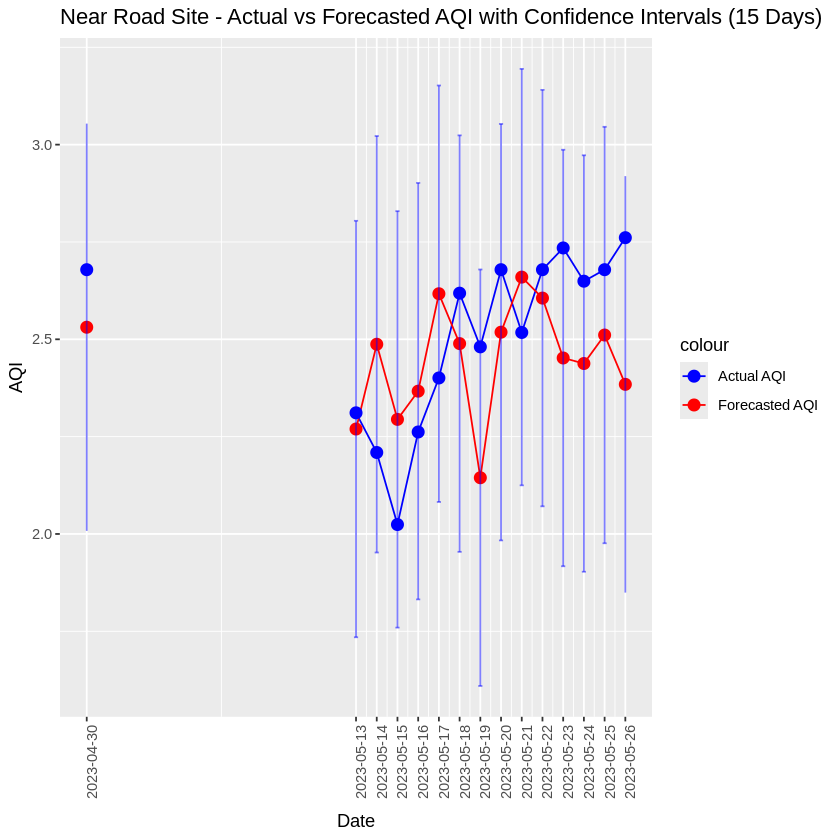

In [ ]:
########### Forecast for 15 Days (Near Road Site) ##########

# Forecast horizon (next 15 days)
h_daily <- 15

# Select the first 15 unique dates that are available in the test set
unique_dates_near_road <- unique(test_data_near_road$Date)[1:15]
# Filter the test data for these 15 unique dates
test_data_near_road_15_days <- test_data_near_road[test_data_near_road$Date %in% unique_dates_near_road, ]

# Create exogenous_data matrix for the test set (daily) for Near Road site
test_exog_data_near_road_15_days <- as.matrix(test_data_near_road_15_days[, exogenous_vars_near_road])

# Generate daily forecasts for the next 15 available days using the best model for Near Road site
forecast_result_near_road_15_days <- forecast(model2_near_road, h = nrow(test_exog_data_near_road_15_days), xreg = test_exog_data_near_road_15_days)

# Check for infinite values in forecast results and replace them with NA
forecast_result_near_road_15_days$upper[is.infinite(forecast_result_near_road_15_days$upper)] <- NA
forecast_result_near_road_15_days$lower[is.infinite(forecast_result_near_road_15_days$lower)] <- NA

# Extract forecasted values and confidence intervals for Near Road site
forecast_values_near_road_15_days <- as.numeric(forecast_result_near_road_15_days$mean)
lower_bound_near_road_15_days <- as.numeric(forecast_result_near_road_15_days$lower[, 2])
upper_bound_near_road_15_days <- as.numeric(forecast_result_near_road_15_days$upper[, 2])

#Since forecast values are already on the transformed scale, we directly compare the forecasted values using the transformed AQI
forecast_aqi_near_road_15_days <- forecast_values_near_road_15_days
cat("Forecast (Transformed Scale):", forecast_aqi_near_road_15_days, "\n")

# Get actual (transformed) AQI values for the forecast period from the test set
actual_aqi_near_road_15_days <- test_data_near_road_15_days$AQI_for_modeling
cat("Actual (Transformed Scale):", actual_aqi_near_road_15_days, "\n")

# Calculate MAE and RMSE for Near Road site
mae_near_road_15_days <- mean(abs(actual_aqi_near_road_15_days - forecast_aqi_near_road_15_days), na.rm = TRUE)
rmse_near_road_15_days <- sqrt(mean((actual_aqi_near_road_15_days - forecast_aqi_near_road_15_days)^2, na.rm = TRUE))

cat("\nNear Road Site - Forecast Accuracy Metrics (15 Days):\n")
cat("MAE:", round(mae_near_road_15_days, 2), "\n")
cat("RMSE:", round(rmse_near_road_15_days, 2), "\n")

# Create dataframe for plotting for Near Road site
forecast_df_near_road_15_days <- data.frame(
  Date = test_data_near_road_15_days$Date,  # Use dates from the test set
  Actual_AQI = actual_aqi_near_road_15_days,
  Forecasted_AQI = forecast_aqi_near_road_15_days,
  Lower_Bound = lower_bound_near_road_15_days,
  Upper_Bound = upper_bound_near_road_15_days
)

# Remove rows with NA values for plotting
forecast_df_near_road_15_days <- na.omit(forecast_df_near_road_15_days)

# Check for consecutive dates and group them
forecast_df_near_road_15_days <- forecast_df_near_road_15_days %>%
  arrange(Date) %>%
  mutate(Is_Consecutive = c(FALSE, diff(Date) == 1)) %>%
  mutate(Group = cumsum(!Is_Consecutive))  # Create groups of consecutive dates

# Plot actual and forecasted AQI with confidence intervals for Near Road site for 15 days
ggplot(forecast_df_near_road_15_days, aes(x = Date)) +
  # Plot lines only for groups with consecutive dates
  geom_line(data = subset(forecast_df_near_road_15_days, ave(Is_Consecutive, Group, FUN = sum) > 1),
            aes(y = Actual_AQI, color = "Actual AQI")) +
  geom_line(data = subset(forecast_df_near_road_15_days, ave(Is_Consecutive, Group, FUN = sum) > 1),
            aes(y = Forecasted_AQI, color = "Forecasted AQI")) +
  # Plot points for all dates
  geom_point(aes(y = Actual_AQI, color = "Actual AQI"), size = 3) +
  geom_point(aes(y = Forecasted_AQI, color = "Forecasted AQI"), size = 3) +
  geom_errorbar(aes(ymin = Lower_Bound, ymax = Upper_Bound), width = 0.2, color = "blue", alpha = 0.5) +  # Error bars for confidence intervals
  labs(title = "Near Road Site - Actual vs Forecasted AQI with Confidence Intervals (15 Days)",
       x = "Date", y = "AQI") +
  scale_color_manual(values = c("Actual AQI" = "blue", "Forecasted AQI" = "red")) +
  scale_x_date(limits = range(unique_dates_near_road),
               breaks = unique_dates_near_road,
               date_labels = "%Y-%m-%d") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

Forecast (Transformed Scale): 1.848546 1.602698 1.322301 1.641929 1.619928 1.618473 1.64149 1.619207 1.451537 1.561579 1.631475 1.526727 1.639727 1.320899 1.513772 
Actual (Transformed Scale): 1.79495 0.9911539 1.218171 1.385879 1.863552 1.517706 0.9911539 0.9911539 1.218171 1.218171 1.517706 1.517706 1.218171 1.385879 1.517706 

OKC NORTH Site - Forecast Accuracy Metrics (15 Days):
MAE: 0.26 
RMSE: 0.34 


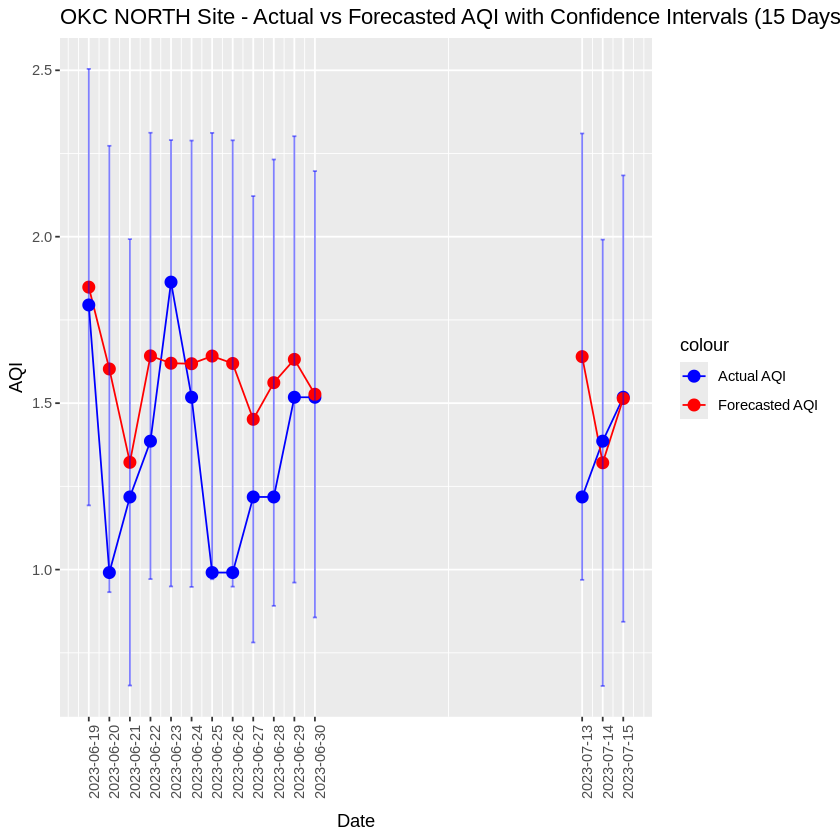

In [ ]:
############# Forecast for 15 Days (OKC NORTH Site) ############

# Forecast horizon (next 15 days)
h_daily <- 15

# Select the first 15 unique dates that are available in the test set
unique_dates_okc_north <- unique(test_data_okc_north$Date)[1:15]
# Filter the test data for these 15 unique dates
test_data_okc_north_15_days <- test_data_okc_north[test_data_okc_north$Date %in% unique_dates_okc_north, ]

# Create exogenous_data matrix for the test set (daily) for OKC NORTH site
test_exog_data_okc_north_15_days <- as.matrix(test_data_okc_north_15_days[, exogenous_vars_okc_north])

# Generate daily forecasts for the next 15 available days using the best model for OKC NORTH site
forecast_result_okc_north_15_days <- forecast(model2_okc_north, h = nrow(test_exog_data_okc_north_15_days), xreg = test_exog_data_okc_north_15_days)


# Check for infinite values in forecast results and replace them with NA
forecast_result_okc_north_15_days$upper[is.infinite(forecast_result_okc_north_15_days$upper)] <- NA
forecast_result_okc_north_15_days$lower[is.infinite(forecast_result_okc_north_15_days$lower)] <- NA

# Extract forecasted values and confidence intervals for OKC NORTH site
forecast_values_okc_north_15_days <- as.numeric(forecast_result_okc_north_15_days$mean)
lower_bound_okc_north_15_days <- as.numeric(forecast_result_okc_north_15_days$lower[, 2])
upper_bound_okc_north_15_days <- as.numeric(forecast_result_okc_north_15_days$upper[, 2])

#Since forecast values are already on the transformed scale, we directly compare the forecasted values using the transformed AQI
forecast_aqi_okc_north_15_days <- forecast_values_okc_north_15_days
cat("Forecast (Transformed Scale):", forecast_aqi_okc_north_15_days, "\n")

# Get actual (transformed) AQI values for the forecast period from the test set
actual_aqi_okc_north_15_days <- test_data_okc_north_15_days$AQI_for_modeling
cat("Actual (Transformed Scale):", actual_aqi_okc_north_15_days, "\n")

# Calculate MAE and RMSE for OKC NORTH site
mae_okc_north_15_days <- mean(abs(actual_aqi_okc_north_15_days - forecast_aqi_okc_north_15_days), na.rm = TRUE)
rmse_okc_north_15_days <- sqrt(mean((actual_aqi_okc_north_15_days - forecast_aqi_okc_north_15_days)^2, na.rm = TRUE))

cat("\nOKC NORTH Site - Forecast Accuracy Metrics (15 Days):\n")
cat("MAE:", round(mae_okc_north_15_days, 2), "\n")
cat("RMSE:", round(rmse_okc_north_15_days, 2), "\n")

# Create dataframe for plotting for OKC NORTH site
forecast_df_okc_north_15_days <- data.frame(
  Date = test_data_okc_north_15_days$Date,  # Use dates from the test set
  Actual_AQI = actual_aqi_okc_north_15_days,
  Forecasted_AQI = forecast_aqi_okc_north_15_days,
  Lower_Bound = lower_bound_okc_north_15_days,
  Upper_Bound = upper_bound_okc_north_15_days
)

# Remove rows with NA values for plotting
forecast_df_okc_north_15_days <- na.omit(forecast_df_okc_north_15_days)

# Create a helper column to identify groups of consecutive dates
forecast_df_okc_north_15_days <- forecast_df_okc_north_15_days %>%
  arrange(Date) %>%
  mutate(Group = cumsum(c(1, diff(Date)) > 1))  # Create groups where there are gaps in dates

# Plot actual and forecasted AQI with confidence intervals for OKC NORTH site for 15 days
ggplot(forecast_df_okc_north_15_days, aes(x = Date)) +
  # Plot lines for Actual AQI within each group separately
  geom_line(data = forecast_df_okc_north_15_days, aes(y = Actual_AQI, color = "Actual AQI", group = Group)) +
  # Plot lines for Forecasted AQI within each group separately
  geom_line(data = forecast_df_okc_north_15_days, aes(y = Forecasted_AQI, color = "Forecasted AQI", group = Group)) +
  # Plot points for all dates
  geom_point(aes(y = Actual_AQI, color = "Actual AQI"), size = 3) +
  geom_point(aes(y = Forecasted_AQI, color = "Forecasted AQI"), size = 3) +
  # Add error bars for confidence intervals
  geom_errorbar(aes(ymin = Lower_Bound, ymax = Upper_Bound), width = 0.2, color = "blue", alpha = 0.5) +
  labs(title = "OKC NORTH Site - Actual vs Forecasted AQI with Confidence Intervals (15 Days)",
       x = "Date", y = "AQI") +
  scale_color_manual(values = c("Actual AQI" = "blue", "Forecasted AQI" = "red")) +
  scale_x_date(breaks = unique_dates_okc_north, date_labels = "%Y-%m-%d") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

Forecast (Transformed Scale): 2.530998 2.269564 2.4873 2.294327 2.366785 2.617005 2.48899 2.144459 2.518315 2.659742 2.605845 2.452007 2.43782 2.51096 2.384297 2.440942 2.503613 2.485794 2.620393 2.491322 2.361262 2.524991 2.600239 2.398238 2.63283 2.564712 2.348308 2.580589 2.531216 2.538859 
Actual (Transformed Scale): 2.678816 2.311148 2.209269 2.024238 2.261955 2.400714 2.618459 2.480619 2.678816 2.517557 2.678816 2.73462 2.649253 2.678816 2.761019 2.649253 2.480619 2.357282 2.480619 2.678816 2.480619 2.786508 2.786508 2.678816 2.858093 2.261955 2.441743 2.73462 2.707244 2.649253 

Near Road Site - Forecast Accuracy Metrics (30 Days):
MAE: 0.18 
RMSE: 0.2 


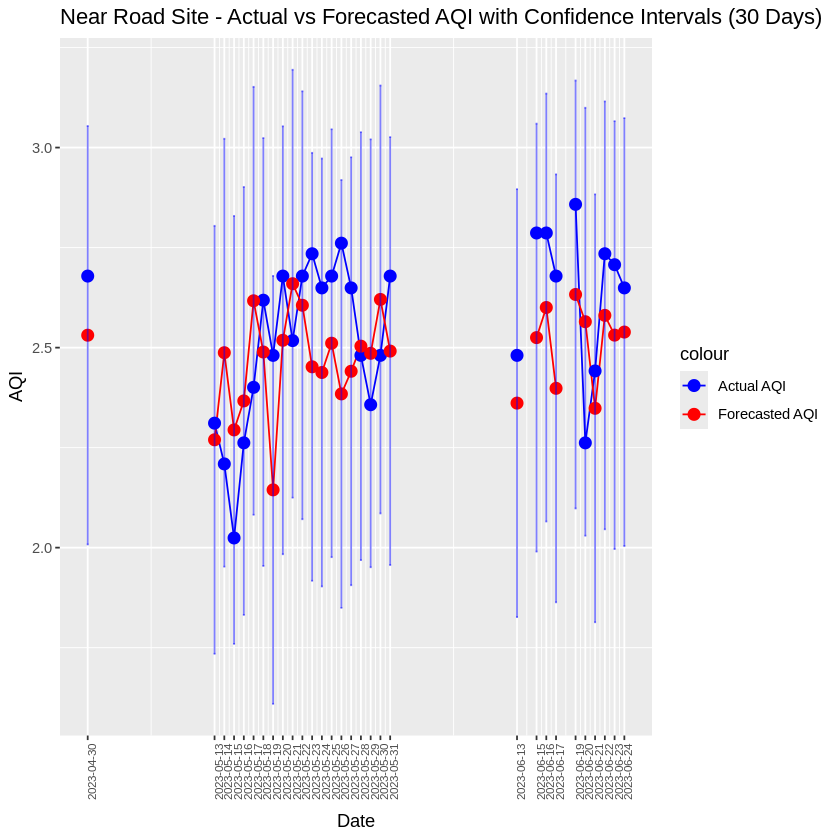

In [ ]:
################ Forecast for 30 Days (Near Road Site) ####################

# Forecast horizon (next 30 days)
h_daily <- 30

# Select the first 30 unique dates that are available in the test set
unique_dates_near_road <- unique(test_data_near_road$Date)[1:30]
# Filter the test data for these 30 unique dates
test_data_near_road_30_days <- test_data_near_road[test_data_near_road$Date %in% unique_dates_near_road, ]

# Create exogenous_data matrix for the test set (daily) for Near Road site
test_exog_data_near_road_30_days <- as.matrix(test_data_near_road_30_days[, exogenous_vars_near_road])

# Generate daily forecasts for the next 30 available days using the best model for Near Road site
forecast_result_near_road_30_days <- forecast(auto_model_near_road, h = nrow(test_exog_data_near_road_30_days), xreg = test_exog_data_near_road_30_days)

# Check for infinite values in forecast results and replace them with NA
forecast_result_near_road_30_days$upper[is.infinite(forecast_result_near_road_30_days$upper)] <- NA
forecast_result_near_road_30_days$lower[is.infinite(forecast_result_near_road_30_days$lower)] <- NA

# Extract forecasted values and confidence intervals for Near Road site
forecast_values_near_road_30_days <- as.numeric(forecast_result_near_road_30_days$mean)
lower_bound_near_road_30_days <- as.numeric(forecast_result_near_road_30_days$lower[, 2])
upper_bound_near_road_30_days <- as.numeric(forecast_result_near_road_30_days$upper[, 2])

#Since forecast values are already on the transformed scale, we directly compare the forecasted values using the transformed AQI
forecast_aqi_near_road_30_days <- forecast_values_near_road_30_days
cat("Forecast (Transformed Scale):", forecast_aqi_near_road_30_days, "\n")

# Get actual (transformed) AQI values for the forecast period from the test set
actual_aqi_near_road_30_days <- test_data_near_road_30_days$AQI_for_modeling
cat("Actual (Transformed Scale):", actual_aqi_near_road_30_days, "\n")

# Calculate MAE and RMSE for Near Road site
mae_near_road_30_days <- mean(abs(actual_aqi_near_road_30_days - forecast_aqi_near_road_30_days), na.rm = TRUE)
rmse_near_road_30_days <- sqrt(mean((actual_aqi_near_road_30_days - forecast_aqi_near_road_30_days)^2, na.rm = TRUE))

cat("\nNear Road Site - Forecast Accuracy Metrics (30 Days):\n")
cat("MAE:", round(mae_near_road_30_days, 2), "\n")
cat("RMSE:", round(rmse_near_road_30_days, 2), "\n")

# Create dataframe for plotting for Near Road site
forecast_df_near_road_30_days <- data.frame(
  Date = test_data_near_road_30_days$Date,  # Use dates from the test set
  Actual_AQI = actual_aqi_near_road_30_days,
  Forecasted_AQI = forecast_aqi_near_road_30_days,
  Lower_Bound = lower_bound_near_road_30_days,
  Upper_Bound = upper_bound_near_road_30_days
)

# Remove rows with NA values for plotting
forecast_df_near_road_30_days <- na.omit(forecast_df_near_road_30_days)

# Create a helper column to identify groups of consecutive dates
forecast_df_near_road_30_days <- forecast_df_near_road_30_days %>%
  arrange(Date) %>%
  mutate(Group = cumsum(c(1, diff(Date)) > 1))  # Create groups where there are gaps in dates

# Plot actual and forecasted AQI with confidence intervals for Near Road site for 30 days
ggplot(forecast_df_near_road_30_days, aes(x = Date)) +
  # Plot lines for Actual AQI within each group separately
  geom_line(data = forecast_df_near_road_30_days, aes(y = Actual_AQI, color = "Actual AQI", group = Group)) +
  # Plot lines for Forecasted AQI within each group separately
  geom_line(data = forecast_df_near_road_30_days, aes(y = Forecasted_AQI, color = "Forecasted AQI", group = Group)) +
  # Plot points for all dates
  geom_point(aes(y = Actual_AQI, color = "Actual AQI"), size = 3) +
  geom_point(aes(y = Forecasted_AQI, color = "Forecasted AQI"), size = 3) +
  # Add error bars for confidence intervals
  geom_errorbar(aes(ymin = Lower_Bound, ymax = Upper_Bound), width = 0.2, color = "blue", alpha = 0.5) +
  labs(title = "Near Road Site - Actual vs Forecasted AQI with Confidence Intervals (30 Days)",
       x = "Date", y = "AQI") +
  scale_color_manual(values = c("Actual AQI" = "blue", "Forecasted AQI" = "red")) +
  scale_x_date(breaks = unique_dates_near_road, date_labels = "%Y-%m-%d") +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 7)
  )

Forecast (Transformed Scale): 1.848546 1.602698 1.322301 1.641929 1.619928 1.618473 1.64149 1.619207 1.451537 1.561579 1.631475 1.526727 1.639727 1.320899 1.513772 1.639602 1.523209 1.489172 1.61535 1.3393 1.93537 1.820365 1.659904 1.511049 1.520073 1.556478 1.38073 1.515522 1.824207 1.574681 
Actual (Transformed Scale): 1.79495 0.9911539 1.218171 1.385879 1.863552 1.517706 0.9911539 0.9911539 1.218171 1.218171 1.517706 1.517706 1.218171 1.385879 1.517706 1.716611 1.517706 1.517706 1.979055 0.9911539 1.716611 1.517706 1.863552 1.79495 1.625643 1.625643 1.517706 1.517706 1.924433 1.625643 

OKC NORTH Site - Forecast Accuracy Metrics (30 Days):
MAE: 0.2 
RMSE: 0.28 


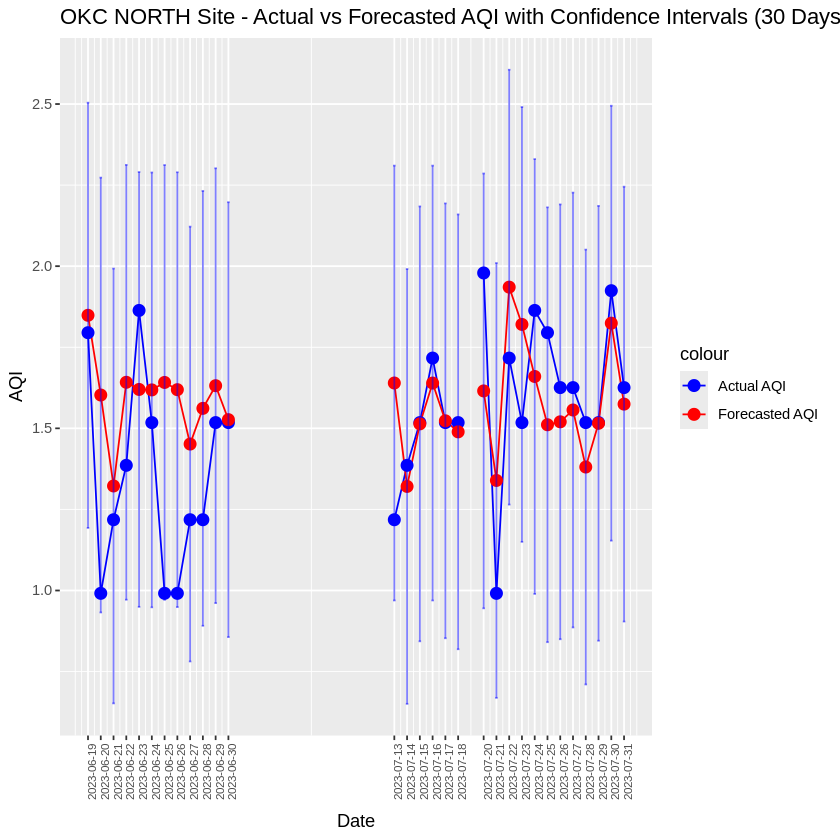

In [ ]:
########### for OKC NORTH site ########

# Forecast horizon (next 30 days)
h_daily <- 30

# Select the first 30 unique dates that are available in the test set
unique_dates_okc_north <- unique(test_data_okc_north$Date)[1:30]
# Filter the test data for these 30 unique dates
test_data_okc_north_30_days <- test_data_okc_north[test_data_okc_north$Date %in% unique_dates_okc_north, ]

# Create exogenous_data matrix for the test set (daily) for OKC NORTH site
test_exog_data_okc_north_30_days <- as.matrix(test_data_okc_north_30_days[, exogenous_vars_okc_north])

# Generate daily forecasts for the next 30 available days using the best model for OKC NORTH site
forecast_result_okc_north_30_days <- forecast(model2_okc_north, h = nrow(test_exog_data_okc_north_30_days), xreg = test_exog_data_okc_north_30_days)


# Check for infinite values in forecast results and replace them with NA
forecast_result_okc_north_30_days$upper[is.infinite(forecast_result_okc_north_30_days$upper)] <- NA
forecast_result_okc_north_30_days$lower[is.infinite(forecast_result_okc_north_30_days$lower)] <- NA

# Extract forecasted values and confidence intervals for OKC NORTH site
forecast_values_okc_north_30_days <- as.numeric(forecast_result_okc_north_30_days$mean)
lower_bound_okc_north_30_days <- as.numeric(forecast_result_okc_north_30_days$lower[, 2])
upper_bound_okc_north_30_days <- as.numeric(forecast_result_okc_north_30_days$upper[, 2])

#Since forecast values are already on the transformed scale, we directly compare the forecasted values using the transformed AQI
forecast_aqi_okc_north_30_days <- forecast_values_okc_north_30_days
cat("Forecast (Transformed Scale):", forecast_aqi_okc_north_30_days, "\n")

# Get actual (transformed) AQI values for the forecast period from the test set
actual_aqi_okc_north_30_days <- test_data_okc_north_30_days$AQI_for_modeling
cat("Actual (Transformed Scale):", actual_aqi_okc_north_30_days, "\n")

# Calculate MAE and RMSE for OKC NORTH site
mae_okc_north_30_days <- mean(abs(actual_aqi_okc_north_30_days - forecast_aqi_okc_north_30_days), na.rm = TRUE)
rmse_okc_north_30_days <- sqrt(mean((actual_aqi_okc_north_30_days - forecast_aqi_okc_north_30_days)^2, na.rm = TRUE))

cat("\nOKC NORTH Site - Forecast Accuracy Metrics (30 Days):\n")
cat("MAE:", round(mae_okc_north_30_days, 2), "\n")
cat("RMSE:", round(rmse_okc_north_30_days, 2), "\n")

# Create dataframe for plotting for OKC NORTH site
forecast_df_okc_north_30_days <- data.frame(
  Date = test_data_okc_north_30_days$Date,  # Use dates from the test set
  Actual_AQI = actual_aqi_okc_north_30_days,
  Forecasted_AQI = forecast_aqi_okc_north_30_days,
  Lower_Bound = lower_bound_okc_north_30_days,
  Upper_Bound = upper_bound_okc_north_30_days
)

# Remove rows with NA values for plotting
forecast_df_okc_north_30_days <- na.omit(forecast_df_okc_north_30_days)

# Create a helper column to identify groups of consecutive dates
forecast_df_okc_north_30_days <- forecast_df_okc_north_30_days %>%
  arrange(Date) %>%
  mutate(Group = cumsum(c(1, diff(Date)) > 1))  # Create groups where there are gaps in dates

# Plot actual and forecasted AQI with confidence intervals for OKC NORTH site for 30 days
ggplot(forecast_df_okc_north_30_days, aes(x = Date)) +
  # Plot lines for Actual AQI within each group separately
  geom_line(data = forecast_df_okc_north_30_days, aes(y = Actual_AQI, color = "Actual AQI", group = Group)) +
  # Plot lines for Forecasted AQI within each group separately
  geom_line(data = forecast_df_okc_north_30_days, aes(y = Forecasted_AQI, color = "Forecasted AQI", group = Group)) +
  # Plot points for all dates
  geom_point(aes(y = Actual_AQI, color = "Actual AQI"), size = 3) +
  geom_point(aes(y = Forecasted_AQI, color = "Forecasted AQI"), size = 3) +
  # Add error bars for confidence intervals
  geom_errorbar(aes(ymin = Lower_Bound, ymax = Upper_Bound), width = 0.2, color = "blue", alpha = 0.5) +
  labs(title = "OKC NORTH Site - Actual vs Forecasted AQI with Confidence Intervals (30 Days)",
       x = "Date", y = "AQI") +
  scale_color_manual(values = c("Actual AQI" = "blue", "Forecasted AQI" = "red")) +
  scale_x_date(breaks = unique_dates_okc_north, date_labels = "%Y-%m-%d") +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 7)
  )